The purpose of this notebook is to evaluate GPDs $G_q(x,\eta,t)$ as well as their conformal moments $\mathbb{G}_q(n,\eta,t)$, where, for a generic GPD, we have its conformal moment expansion
\begin{equation}
G_q(x,\eta,t)=\sum_{n=0}^\infty (-1)^{n}p_n(x,\eta)\mathbb{F}_q(n,\eta,t),\qquad G_g(x,\eta,t)=\sum_{n=1}^\infty (-1)^{n-1}\, {^g\!p}_n(x,\eta) \mathbb{G}_g(n,\eta,t),
\end{equation}
where $G=H,E,\widetilde{H},\widetilde{E},H^T,E^T,\widetilde{H}^T,\widetilde{E}^T$.

To this end, we import the MSTW PDF parametrization of PDFs. The conformal moments are obtained by Reggeized $x$ integrals over PDFs at some input scale $\mu_0=1$ GeV and evolved using the pertinent RGEs.

In [1]:
# Import necessary libraries and set display options
from scipy.integrate import quad
import time

from GPD_functions import *
from GPD_data import *

# Set display options
np.set_printoptions(linewidth=200)

Plots of conformal moments $\mathbb{G}_q(n,\eta,t)$ and their RGE evolution

Momentum space

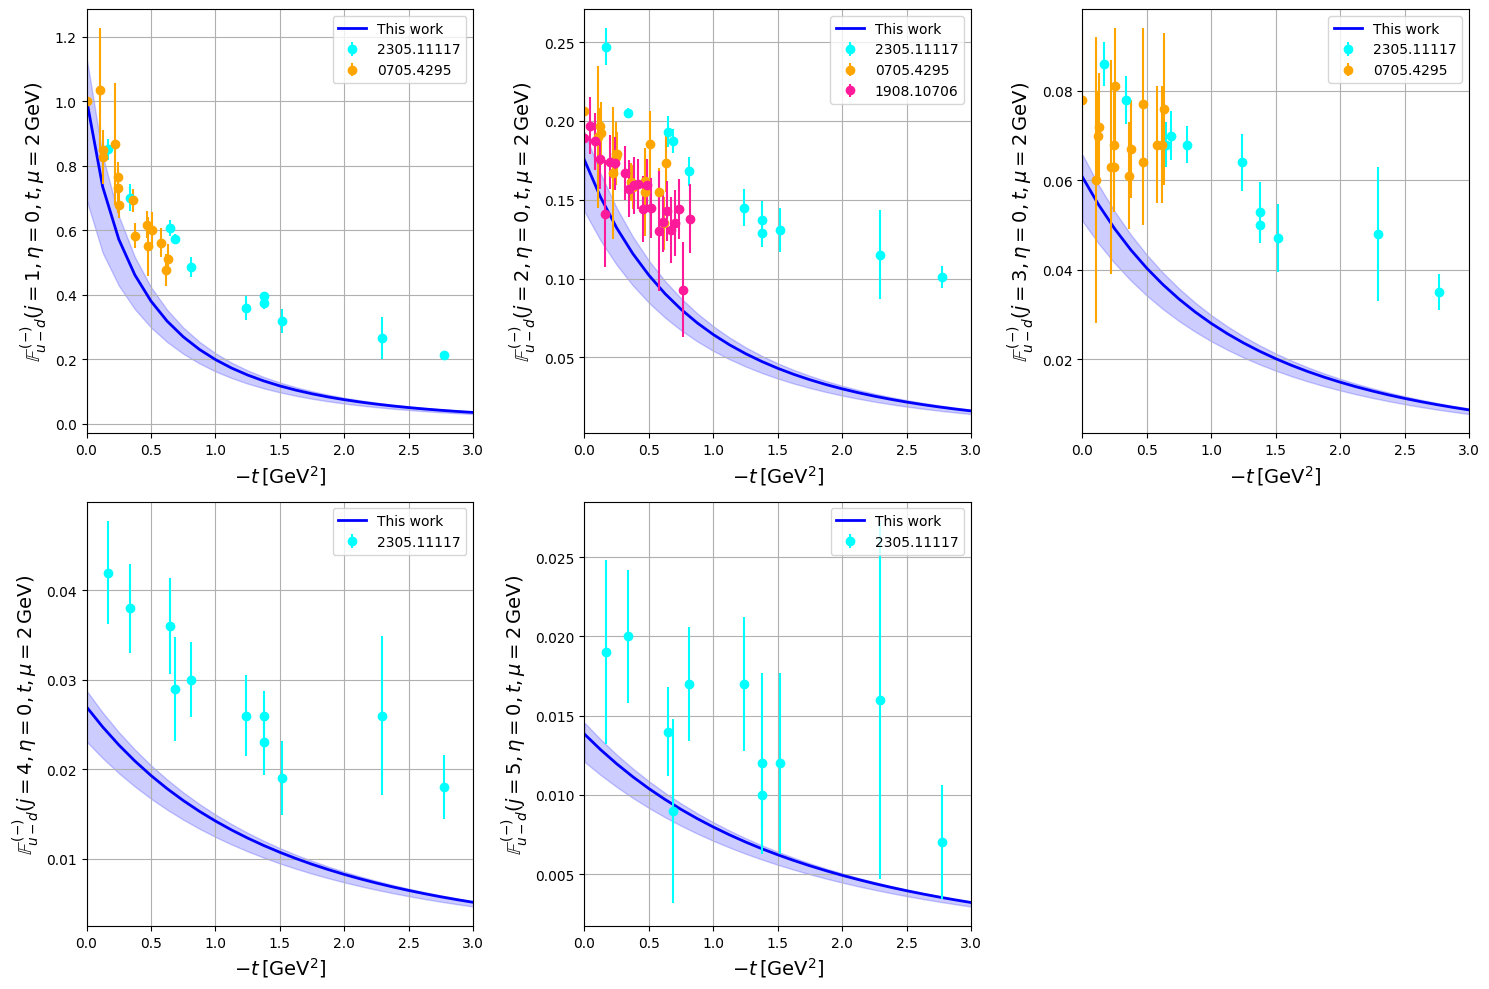

In [2]:
#NonSingletIsovector
y_label = "$\\mathbb{{F}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsovector"
moment_label = "A"

plot_moments(moment_type, moment_label,y_label,3,25)

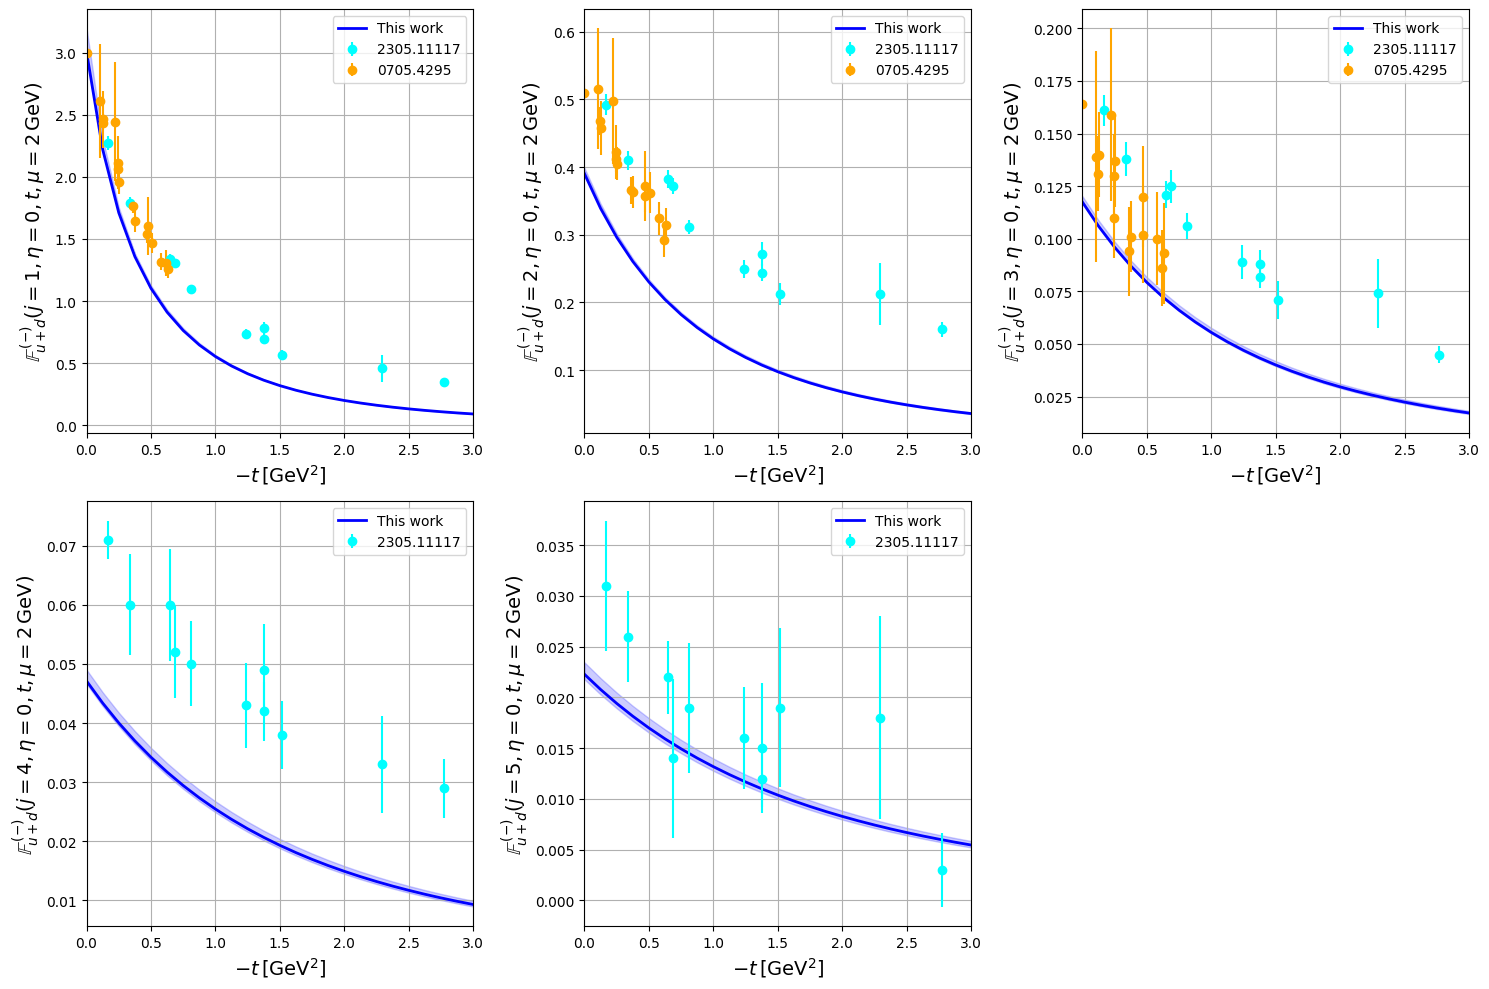

In [3]:
# NonSingletIsoscalar
y_label = "$\\mathbb{{F}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsoscalar"
moment_label = "A"

plot_moments(moment_type, moment_label,y_label,3,25)

Impact parameter representation

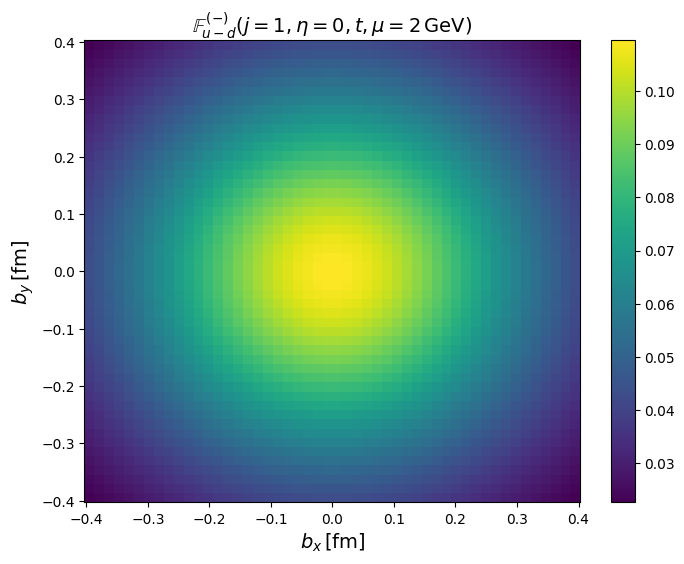

In [2]:
# Plot NonSingletIsovector in 2D impact parameter space
moment_type = "NonSingletIsovector"
moment_label = "A"
plot_title = "$\\mathbb{{F}}_{{u-d}}^{{\,\,(-)}}$"
plot_fourier_transform_moments(moment_type,moment_label,plot_title, 1, 2)

Conformal Moments and their evolution

In [2]:
# Define singlet conformal moments and their evolution
def diagonal_singlet(j,eta,t,Nf=3,evolve_type="vector",solution="+",error_type="central"):
    # Switch sign
    if solution == "+":
        solution = "-"
    elif solution == "-":
        solution = "+"
    else:
        raise ValueError("Invalid solution type. Use '+' or '-'.")
    #if evolve_type == "vector":
        # quark_in = quark_singlet_Regge(j,eta,t,Nf,error_type)
        # gluon_prf = (j/6*gamma_qg(j-1,Nf,evolve_type)/
        #              (gamma_qq(j-1)-gamma_pm(j-1,Nf,evolve_type,solution)))
        # gluon_in = gluon_Regge(j,eta,t, error_type)
        # result = quark_in + gluon_prf * gluon_in
        # print(quark_in)
        # print(gluon_prf)
        # print(gluon_in)
        #return result
    if evolve_type == "vector":
        quark_in = quark_singlet_Regge(j,eta,t,Nf,error_type)
        # Note: j/6 already included in gamma_qg and gamma_gg definitions
        gluon_prf = (gamma_qg(j-1,Nf,evolve_type)/
                     (gamma_qq(j-1)-gamma_pm(j-1,Nf,evolve_type,solution)))
        gluon_in = gluon_Regge(j,eta,t, error_type)
        result = quark_in + gluon_prf * gluon_in
        # print(quark_in)
        # print(gluon_prf)
        # print(gluon_in)
        return result
    elif evolve_type == "axial":
        print("Axial is ToDo")
        return 0
    else:
        raise ValueError("Type must be vector or axial")

def evolve_quark_singlet(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 0.51 @ mu = 2 GeV from 2310.08484
    A0 = 0.51/0.5618
    GPD_in_p = diagonal_singlet(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet(j, eta, t, Nf, evolve_type, "-", error_type)
    term_1 = gamma_qq(j-1)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = Gamma_pm(j-1,Nf,evolve_type,"-")*evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
    term_3 = Gamma_pm(j-1,Nf,evolve_type,"+")*evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-")
    result = A0*term_1*(term_2-term_3)
    return result

def evolve_quark_singlet_D(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 1.3 @ mu = 2 GeV from 2310.08484
    D0 = 1.3/1.0979
    eta = 1 # Result is eta independent
    term_1 = evolve_quark_singlet(j,eta,t,mu,Nf,evolve_type,error_type)
    term_2 = evolve_quark_singlet(j,0,t,mu,Nf,evolve_type,error_type)
    result = D0 * (term_1-term_2)/eta**2
    return result

def evolve_gluon(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 0.501 @ mu = 2 GeV from 2310.08484
    A0 = 0.501/0.43807
    GPD_in_p = diagonal_singlet(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet(j, eta, t, Nf, evolve_type, "-", error_type)
    # Note: j/6 already included in gamma_qg and gamma_gg definitions
    #term_1 = 6/j*gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_1 = gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = (evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
              -evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-"))
    result = A0*term_1*term_2
    return result
    
def evolve_gluon_D(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale from holography (II.9) in 2204.08857
    D0 = 2.57/3.0439
    eta = 1 # Result is eta independent 
    term_1 = evolve_gluon(j,eta,t,mu,Nf,evolve_type,error_type)
    term_2 = evolve_gluon(j,0,t,mu,Nf,evolve_type,error_type)
    result = D0 * (term_1-term_2)/eta**2
    return result

In [89]:
# def numpy_to_mathematica_table(array):
#     """
#     Converts a NumPy array to a Mathematica-style table string.
#     """
#     if array.ndim == 1:  # 1D array
#         return "{" + ", ".join(map(str, array)) + "}"
#     elif array.ndim == 2:  # 2D array
#         rows = ["{" + ", ".join(map(str, row)) + "}" for row in array]
#         return "{" + ", ".join(rows) + "}"
#     else:
#         raise ValueError("Only 1D and 2D arrays are supported.")

# vectorized_evolve_quark_singlet = np.vectorize(evolve_quark_singlet)
# vectorized_evolve_gluon = np.vectorize(evolve_gluon)
# vectorized_diagonal_singlet = np.vectorize(diagonal_singlet)
# vectorized_evolve_quark_singlet_D = np.vectorize(evolve_quark_singlet_D)
# vectorized_evolve_gluon_D = np.vectorize(evolve_gluon_D)

# t_val = np.linspace(-.1,-1,10)
# #print(t_val)
# result = vectorized_evolve_quark_singlet_D(2,0,t_val,2,4)
# #result = vectorized_evolve_gluon_D(2,1,t_val,2,4)
# #result = vectorized_diagonal_singlet(2,.1,t_val,4, "vector","-")
# result = numpy_to_mathematica_table(np.float64(result))
# print(result)

In [66]:
# 0.510024649589122
# 0.5100256941533923
# -1.30044714988575
# 0.50111263175031
# 0.5011083820962285
# -2.57000756593034

In [3]:
print(evolve_quark_singlet(2,0,-1e-4,2,3,"vector","central"))
#print(evolve_quark_singlet_A(2,0,-1e-4,2,3,"vector","central"))
print(evolve_quark_singlet_D(2,1,-1e-4,2,3,"vector","central"))
print(evolve_gluon(2,0,-1e-4,2,3,"vector","central"))
#print(evolve_gluon_A(2,0,-1e-4,2,3,"vector","central"))
print(evolve_gluon_D(2,1,-1e-4,2,3,"vector","central"))

0.5100080912825354
-1.3000426341191
0.5010095423139207
-2.5700257125908


In [68]:
# Compute results for the evolution functions
def compute_results(evolve_function, j, eta, t_values, mu, Nf=3, evolve_type="vector"):
    """Compute central, plus, and minus results for a given evolution function."""
    results = [float(evolve_function(j, eta, t, mu, Nf, evolve_type, "central")) for t in t_values]
    results_plus = [float(evolve_function(j, eta, t, mu, Nf, evolve_type, "plus")) for t in t_values]
    results_minus = [float(evolve_function(j, eta, t, mu, Nf, evolve_type, "minus")) for t in t_values]
    return results, results_plus, results_minus

# Plot results on a provided axis or create a new plot if ax is None
def plot_results(t_values, results, results_plus, results_minus, xlabel, ylabel, ax=None):
    """Plot results on the given axis, or create a new figure if ax is None."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(-t_values, results, label="This work", color="blue")
    ax.fill_between(-t_values, results_minus, results_plus, color="blue", alpha=0.2)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True)
    ax.legend()
    if ax is None:
        plt.tight_layout()
        plt.show()

# Individual evolution plot functions with optional ax input
def plot_evolve_gluon(t_values, mu, Nf=3, ax=None):
    """Compute and plot gluon evolution."""
    results, results_plus, results_minus = compute_results(evolve_gluon, 2, 0, t_values, mu, Nf, "vector")
    plot_results(t_values, results, results_plus, results_minus,
                 xlabel="$-t\,[\mathrm{GeV}^2]$", ylabel="$A_g(t,\mu = 2\,[\mathrm{GeV}])$", ax=ax)

def plot_evolve_quark_singlet(t_values, mu, Nf=3, ax=None):
    """Compute and plot quark singlet evolution."""
    results, results_plus, results_minus = compute_results(evolve_quark_singlet, 2, 0, t_values, mu, Nf, "vector")
    plot_results(t_values, results, results_plus, results_minus,
                 xlabel="$-t\,[\mathrm{GeV}^2]$", ylabel="$A_{u+d+s}(t,\mu = 2\,[\mathrm{GeV}])$", ax=ax)

def plot_evolve_gluon_D(t_values, mu, Nf=3, ax=None):
    """Compute and plot gluon D evolution."""
    results, results_plus, results_minus = compute_results(evolve_gluon_D, 2, 1, t_values, mu, Nf, "vector")
    plot_results(t_values, results, results_plus, results_minus,
                 xlabel="$-t\,[\mathrm{GeV}^2]$", ylabel="$D_g(t,\mu = 2\,[\mathrm{GeV}])$", ax=ax)

def plot_evolve_quark_singlet_D(t_values, mu, Nf=3, ax=None):
    """Compute and plot quark singlet D evolution."""
    results, results_plus, results_minus = compute_results(evolve_quark_singlet_D, 2, 1, t_values, mu, Nf, "vector")
    plot_results(t_values, results, results_plus, results_minus,
                 xlabel="$-t\,[\mathrm{GeV}^2]$", ylabel="$D_{u+d+s}(t,\mu = 2\,[\mathrm{GeV}])$", ax=ax)


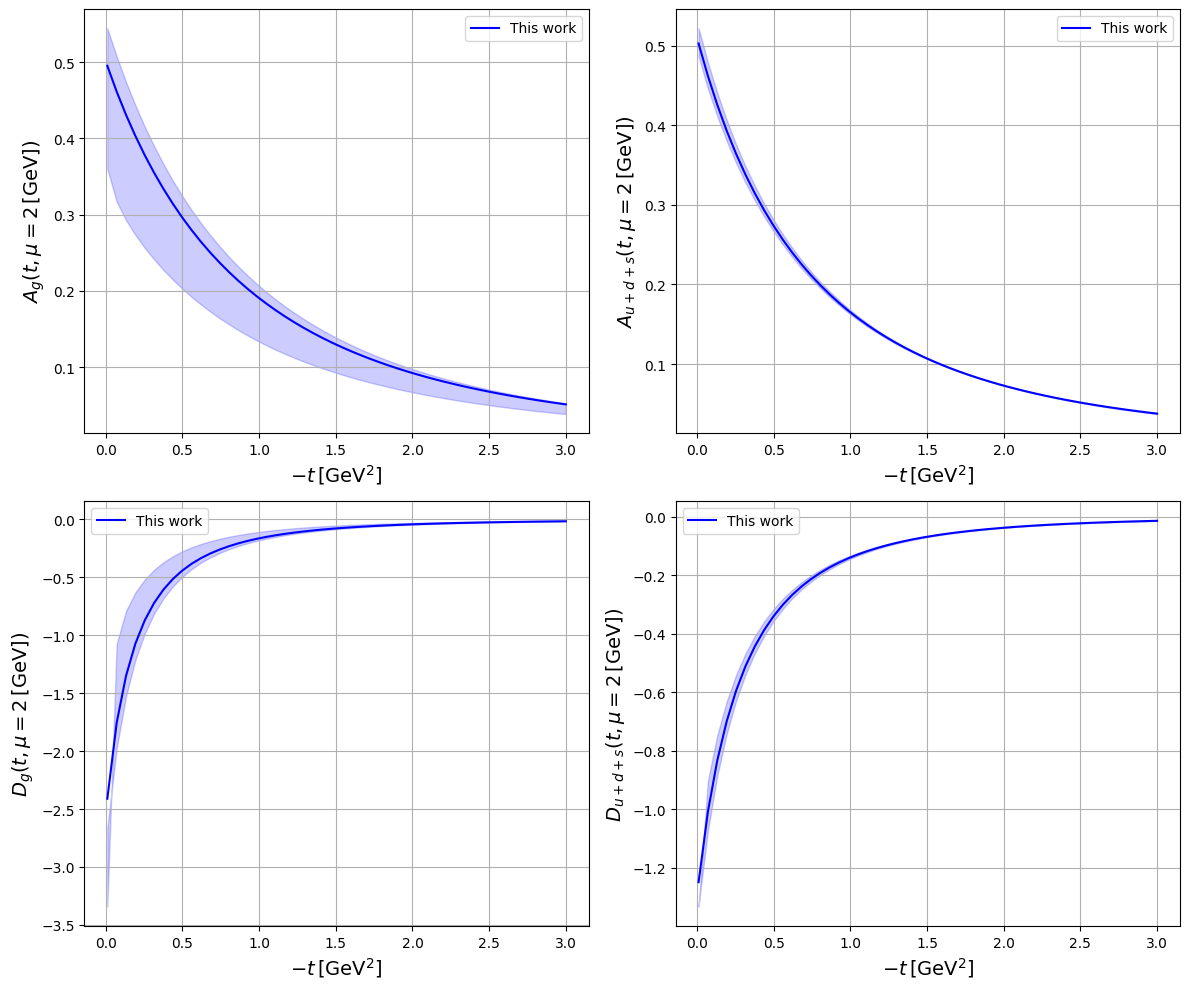

In [70]:
# Main script for running subplots or individual plots
if __name__ == "__main__":
    t_values = np.linspace(-1e-2, -3, 50)  # Generate values of t
    Nf = 3  # Set Nf dynamically
    mu = 2

    # Parallelize data computation with Nf passed as an argument
    results = Parallel(n_jobs=-1)(
        delayed(func)(t_values, mu=mu, Nf=Nf) for func in [
            plot_evolve_gluon, 
            plot_evolve_quark_singlet,
            plot_evolve_gluon_D, 
            plot_evolve_quark_singlet_D
        ]
    )

    # Create a figure with a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

    # Plot results for each function on subplots
    plot_evolve_gluon(t_values,mu=mu, Nf=Nf, ax=axes[0, 0])
    plot_evolve_quark_singlet(t_values,mu=mu, Nf=Nf, ax=axes[0, 1])
    plot_evolve_gluon_D(t_values, mu=mu , Nf=Nf, ax=axes[1, 0])
    plot_evolve_quark_singlet_D(t_values, mu =mu, Nf=Nf, ax=axes[1, 1])

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

Define the conformal partial waves

In [110]:
# Define conformal partial waves
def conformal_pw_q(j, x, eta, parity="even"):
    """
    Calculate the conformal partial waves for quark GPDs and generate their
    respective "even" or "odd" combinations.

    Parameters:
    j (complex): Conformal spin
    x (float): Value of parton x
    eta (float): Value of skewness
    parity (str, optional): The parity of the function. Either 'even' or 'odd'. Default is 'even'.

    Returns:
    mpc: Value of even or odd combination of conformal quark partial waves

    Raises:
    ValueError: If the `parity` argument is not "even" or "odd".

    Notes:
    - Branch cut starting at j < 1
    - The result is vectorized later on using np.vectorize for handling array inputs.
    """

    if parity not in ["even", "odd","none"]:
        raise ValueError("Parity must be even, odd or none")
    
    # Precompute factors that do not change
    gamma_term = lambda j: 2.0**j * gamma(1.5 + j) / (gamma(0.5) * gamma(j))
    sin_term = lambda j: mp.sin(np.pi * j) / np.pi  

    def cal_P(x):
        arg = (1 + x / eta)
        hyp = mp.hyp2f1(-j, j + 1, 2, 0.5 * arg)
        result = arg * hyp * gamma_term(j)
        return result
    def cal_Q(x): 
        hyp = mp.hyp2f1(0.5 * j, 0.5 * (j + 1), 1.5 + j, (eta / x)**2) 
        result = hyp * sin_term(j)
        return result

    def p_j(x):
        # Initialize P_term and Q_term with zero
        P_term = 0
        Q_term = 0        
        if eta - np.abs(x) >= 0 :  # If condition for cal_P is satisfied
            # Note continuity at x = eta gives cal_P = cal_Q
            P_term = 1 / eta**j * cal_P(x)
        elif x - eta > 0 :
            Q_term = 1 / x**j * cal_Q(x)
        return P_term + Q_term
    
    if parity == "even":    # Even parity
        result = p_j(x) + p_j(-x)
    elif parity == "odd":   # Odd parity
        result = p_j(x) - p_j(-x)
    else :
        result = p_j(x)     # No parity for non_singlet

    conformal_pw = result
    return conformal_pw
# Vectorize for plotting and convert to np
vectorized_conformal_pw_q = np.vectorize(conformal_pw_q, otypes=[np.complex128])


def conformal_pw_g(j, x, eta, parity="even"):
    """
    Calculate the conformal partial waves for gluon GPDs and generate their
    respective "even" or "odd" parity combinations.

    Parameters:
    j (complex): Conformal spin
    x (float): Value of parton x
    eta (float): Value of skewness
    parity (str, optional): The parity of the function. Either 'none', 'even' or 'odd'. Default is 'even'.

    Returns:
    mpc: Value of even or odd combination of conformal gluno partial waves

    Raises:
    ValueError: If the `parity` argument is not "even" or "odd".

    Notes:
    - Branch cut starting at j < 2
    - The result is vectorized later on using np.vectorize for handling array inputs.
    """
    # Precompute factors that do not change
    gamma_term = lambda j: 2.0**(j-1) * gamma(1.5 + j) / (gamma(0.5) * gamma(j-1))
    sin_term =lambda j: mp.sin(np.pi * (j+1))  / np.pi 

    def cal_P(x):
        arg = (1. + x / eta)
        hyp = mp.hyp2f1(-j, j + 1, 3, 0.5 * arg)
        result = arg**2 * hyp * gamma_term(j)
        return result
    def cal_Q(x): 
        hyp = mp.hyp2f1(0.5 * (j-1), 0.5 * j, 1.5 + j, (eta / x)**2) 
        result = hyp * sin_term(j)
        return result
    
    if parity not in ["even", "odd","none"]:
        raise ValueError("Parity must be even, odd or none")

    def p_j(x):
        # Initialize P_term and Q_term with zero
        P_term = 0
        Q_term = 0        
        if eta - np.abs(x) >= 0 :  # If condition for cal_P is satisfied
            P_term = 1 / eta**(j-1) * cal_P(x)
        elif x - eta > 0 :
            Q_term = 1 / x**(j-1) * cal_Q(x)
        return P_term + Q_term
    
    if parity == "even":    # Even parity
        result = p_j(x) + p_j(-x)
    elif parity == "odd":   # Odd parity
        result = p_j(x) - p_j(-x)
    else :
        result = p_j(x)     # No parity
    conformal_pw = result
    return conformal_pw
# Vectorize and convert to np for plotting
vectorized_conformal_pw_g = np.vectorize(conformal_pw_g, otypes=[np.complex128])

def j_base_q(parity="none"):
    if parity == "even":
        j_base = 1
    elif parity == "odd":
        j_base = 2
    elif parity == "none":
        j_base = 1
    else :
        raise ValueError("Parity must be even, odd or none")
    return j_base

def j_base_g(parity="none"):
    if parity == "even":
        j_base = 3
    elif parity == "odd":
        j_base = 2
    elif parity == "none":
        j_base = 2
    else :
        raise ValueError("Parity must be even, odd or none")
    return j_base

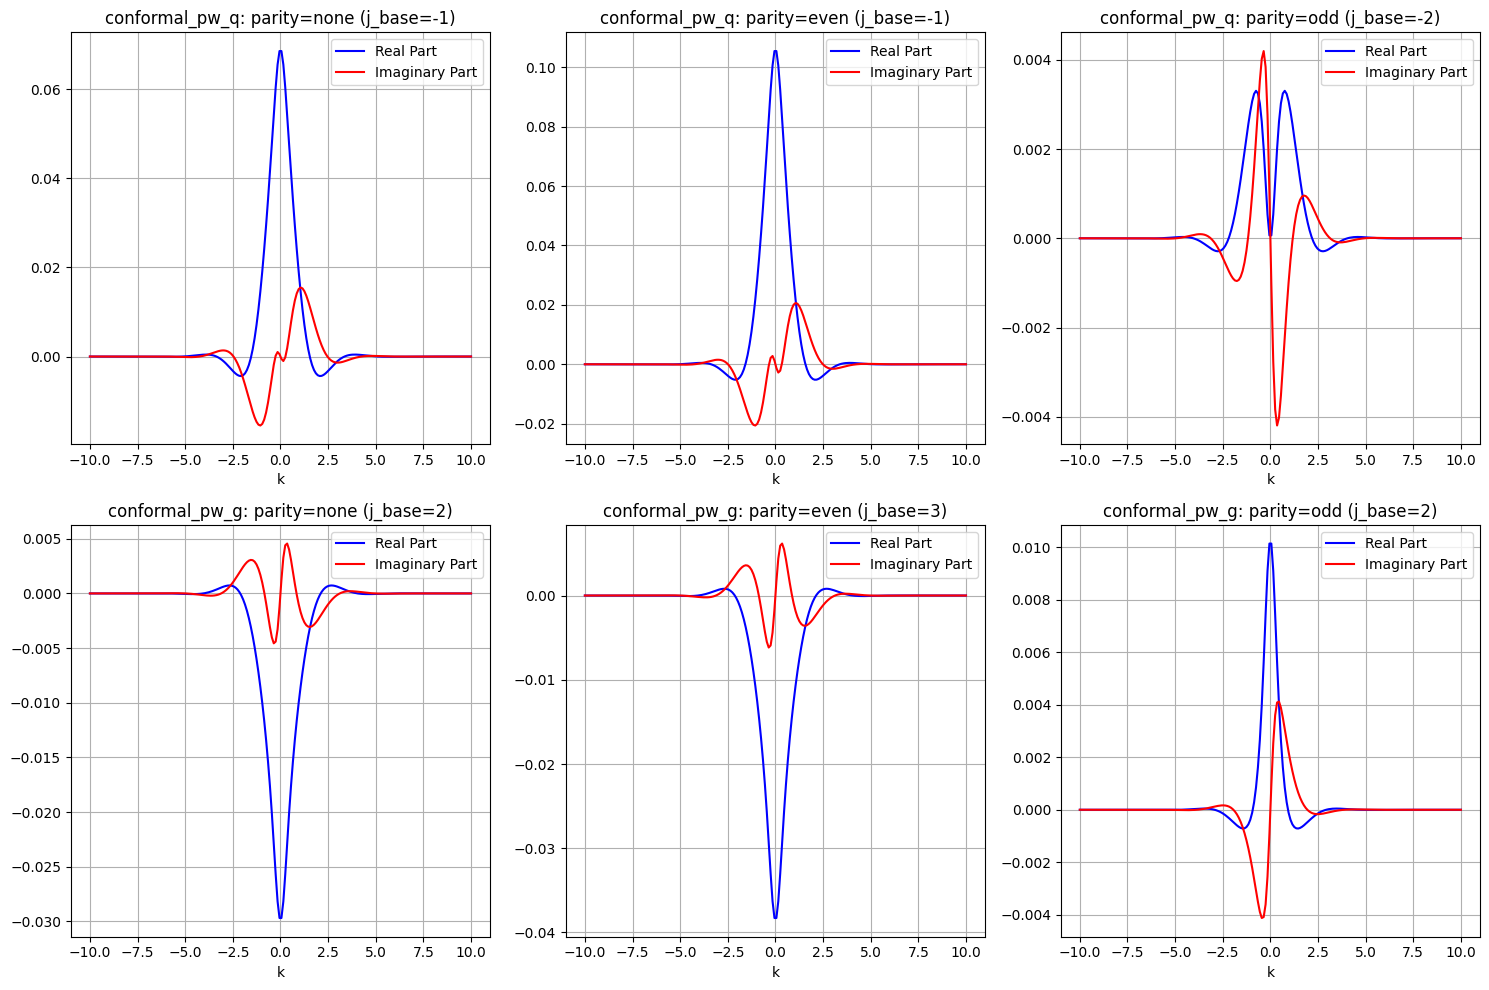

In [8]:
def plot_conformal_pw_q_sin(x, eta, k_range=(-10, 10), num_points=100, parity="even", ax=None):
    j_base = j_base_q(parity)
    k_values = np.linspace(k_range[0], k_range[1], num_points)
    j_values = j_base + 1j * k_values
    sin_term = np.sin(np.pi * j_values) # sin term in SWT
    result = vectorized_conformal_pw_q(j_values, x, eta, parity=parity)/sin_term
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(12, 8))

    ax.plot(k_values, real_part, label="Real Part", color="b")
    ax.plot(k_values, imag_part, label="Imaginary Part", color="r")
    ax.set_xlabel('k')
    ax.set_title(f'conformal_pw_q ({parity}, j = {j_base})')
    ax.grid(True)
    ax.legend()

def plot_conformal_pw_g_sin(x, eta, k_range=(-10, 10), num_points=100, parity="even", ax=None):
    j_base = j_base_q(parity)
    k_values = np.linspace(k_range[0], k_range[1], num_points)
    j_values = j_base + 1j * k_values
    sin_term = np.sin(np.pi * j_values) # sin term in SWT
    result = vectorized_conformal_pw_g(j_values, x, eta, parity=parity)/sin_term
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(12, 8))

    ax.plot(k_values, real_part, label="Real Part", color="b")
    ax.plot(k_values, imag_part, label="Imaginary Part", color="r")
    ax.set_title(f'conformal_pw_g ({parity}, j = {j_base})')
    ax.set_xlabel('k')
    ax.grid(True)
    ax.legend()

def plot_conformal_pw_qg_sin():
    # Set up a 2x3 grid for the subplots
    _, axes = plt.subplots(2, 3, figsize=(15, 10))

    # List of parities to iterate through
    parities = ["none", "even", "odd"]

    # Plot the data for `plot_conformal_pw_q`
    for i, parity in enumerate(parities):
        plot_conformal_pw_q_sin(.1, 1/3, k_range=(-10, 10), num_points=200, parity=parity, ax=axes[0, i])
        axes[0, i].set_title(f"conformal_pw_q: parity={parity} (j_base={j_base_q(parity)})")

    # Plot the data for `plot_conformal_pw_g`
    for i, parity in enumerate(parities):
        plot_conformal_pw_g_sin(.1, 1/3, k_range=(-10, 10), num_points=200, parity=parity, ax=axes[1, i])
        axes[1, i].set_title(f"conformal_pw_g: parity={parity} (j_base={j_base_g(parity)})")

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the combined plots
    plt.show()
    
plot_conformal_pw_qg_sin()

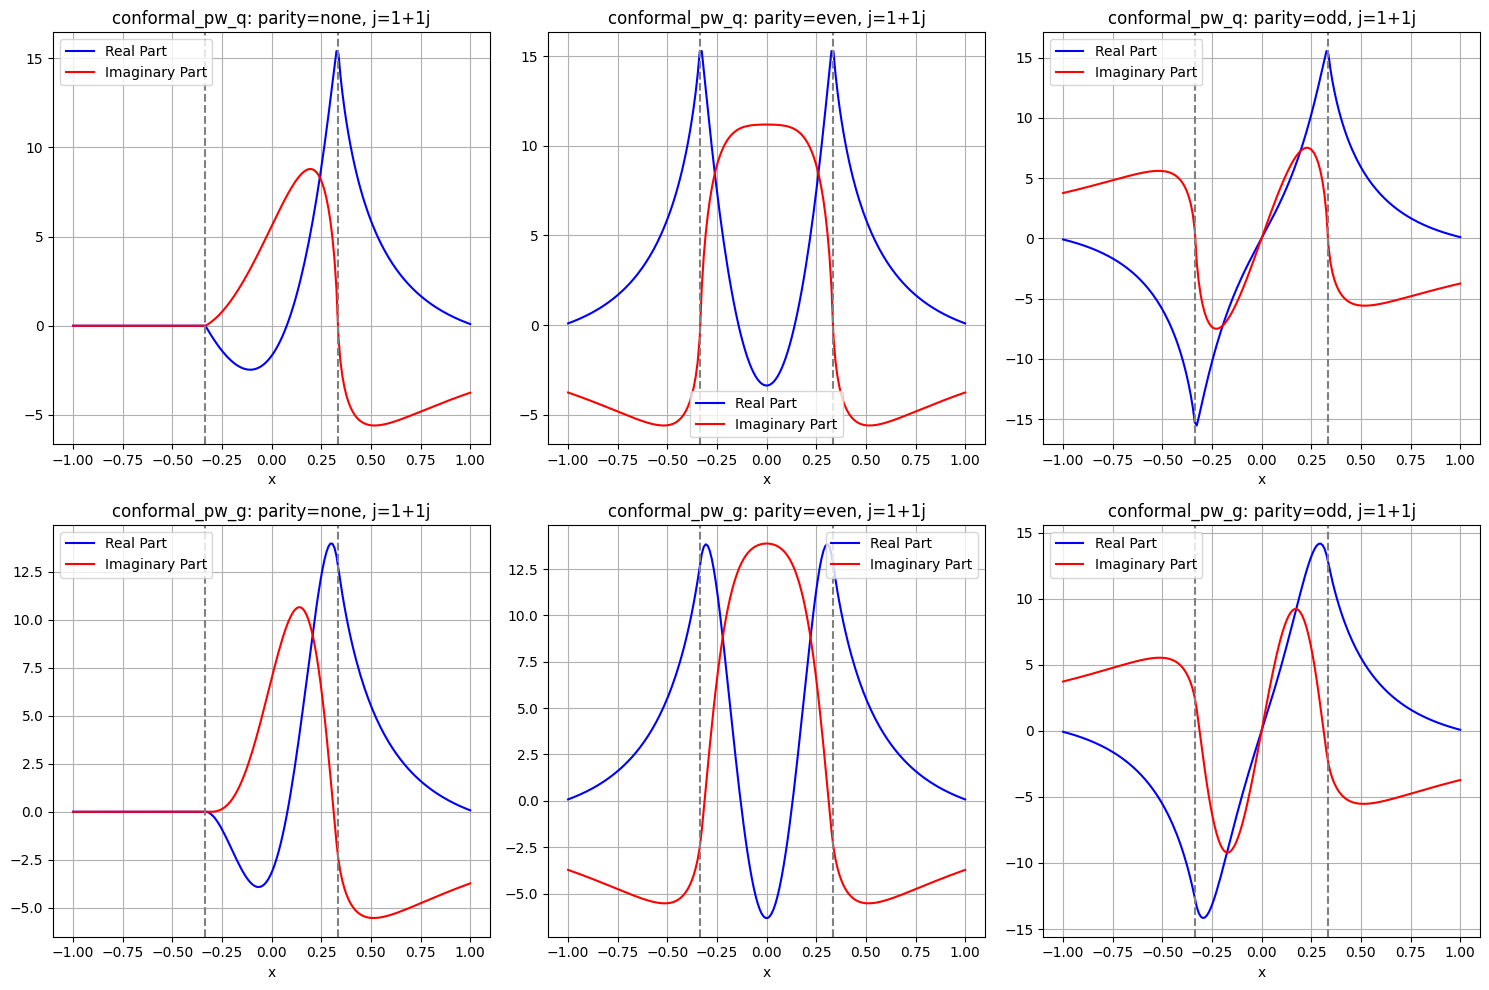

In [9]:
def plot_conformal_pw_q_over_x(eta, x_range=(-1, 1), j = 1 + 1j , num_points=100, parity="even", ax=None):
    #j = 1 + 1j  # Fixed j value
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    result = vectorized_conformal_pw_q(j, x_values, eta, parity=parity)
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(20, 8))

    ax.plot(x_values, real_part, label="Real Part", color="b")
    ax.plot(x_values, imag_part, label="Imaginary Part", color="r")
    ax.axvline(x=eta, linestyle='--', color='gray')
    ax.axvline(x=-eta, linestyle='--', color='gray')
    ax.set_xlabel('x')
    ax.set_title(f'conformal_pw_q ({parity}, j = {j})')
    ax.grid(True)
    ax.legend()


def plot_conformal_pw_g_over_x(eta, x_range=(-1, 1), j = 2+1j, num_points=100, parity="even", ax=None):
    j = 2 + 1j  # Fixed j value
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    result = vectorized_conformal_pw_g(j, x_values, eta, parity=parity)
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(12, 8))

    ax.plot(x_values, real_part, label="Real Part", color="b")
    ax.plot(x_values, imag_part, label="Imaginary Part", color="r")
    ax.axvline(x=eta, linestyle='--', color='gray')
    ax.axvline(x=-eta, linestyle='--', color='gray')
    ax.set_xlabel('x')
    ax.set_title(f'conformal_pw_g ({parity}, j = {j})')
    ax.grid(True)
    ax.legend()


def plot_conformal_pw_qg_over_x(eta,x_range=(-1,1)):
    # Set up a 2x3 grid for the subplots
    _, axes = plt.subplots(2, 3, figsize=(15, 10))

    # List of parities to iterate through
    parities = ["none", "even", "odd"]

    # Plot the data for `plot_conformal_pw_q`
    for i, parity in enumerate(parities):
        plot_conformal_pw_q_over_x(eta, x_range, num_points=200, parity=parity, ax=axes[0, i])
        axes[0, i].set_title(f"conformal_pw_q: parity={parity}, j=1+1j")


    # Plot the data for `plot_conformal_pw_g`
    for i, parity in enumerate(parities):
        plot_conformal_pw_g_over_x(eta, x_range, num_points=200, parity=parity, ax=axes[1, i])
        axes[1, i].set_title(f"conformal_pw_g: parity={parity}, j=1+1j")

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the combined plots
    plt.show()


# Call the modified function
plot_conformal_pw_qg_over_x(1/3,(-1,1))


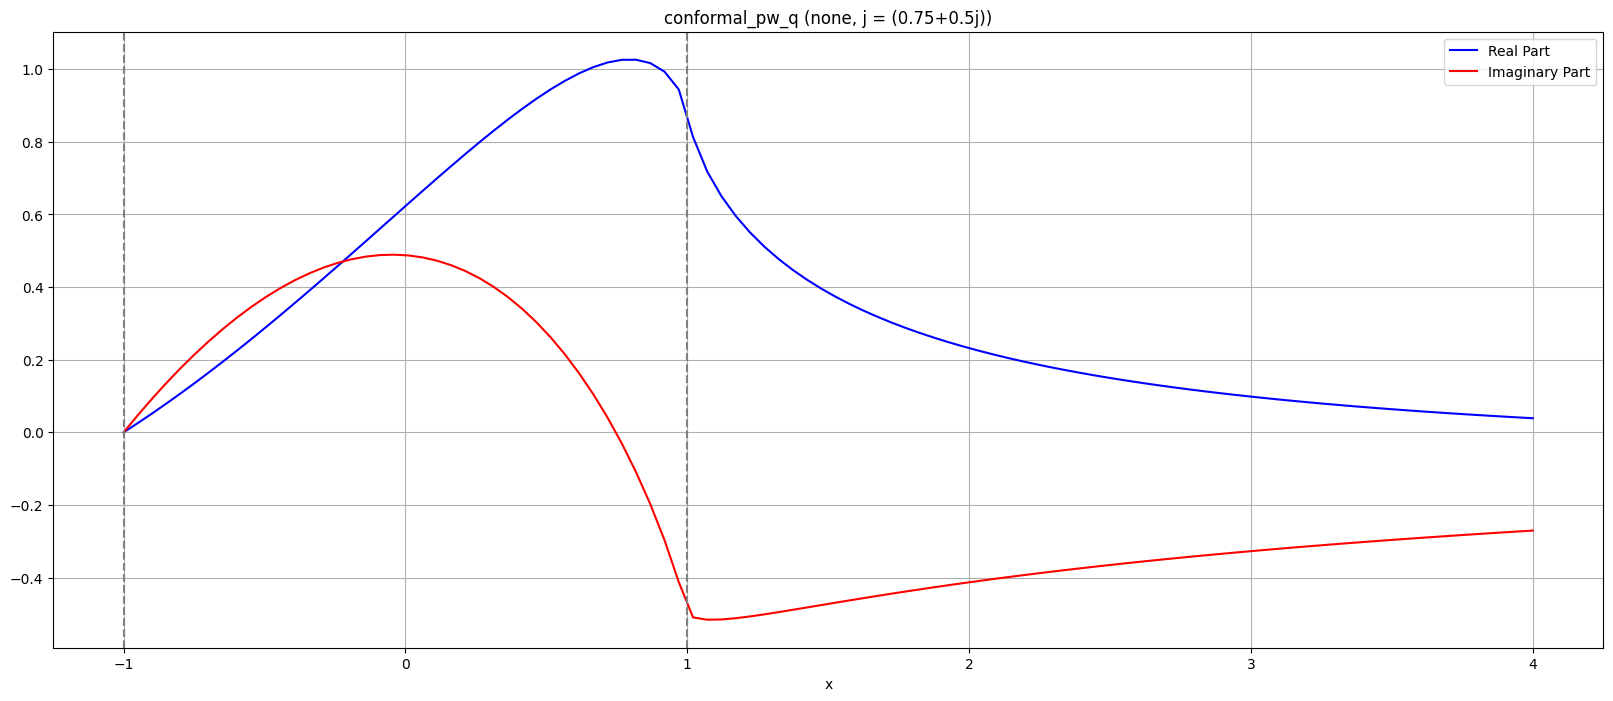

In [18]:
# Figure 4 in 0509204
plot_conformal_pw_q_over_x(1,(-1,4),3/4 + .5j,parity="none")

In [ ]:
# Plot evolve_gluon over imaginary j
def plot_j_evolve_gluon(eta, t, mu,parity="even"):
    """
    Plots evolve_gluon(j, eta, t, mu) over a complex domain of j.

    Parameters:
    - eta (float): Parameter for the evolve_gluon function.
    - t (float): Parameter for the evolve_gluon function.
    - mu (float): Parameter for the evolve_gluon function.
    """
    if parity not in ["even","odd","none"]:
        raise ValueError("Parity must be even, odd or none")
    j_base = j_base_q(parity)

    # Generate j values: j = j_base + 1j * k where -10 <= k <= 10
    k_values = np.linspace(-5, 5, 250)
    j_values = j_base + 1j * k_values

    # Compute the function values in parallel
    results = Parallel(n_jobs=-1)(delayed(evolve_gluon)(j, eta, t, mu,evolve_type = "vector") for j in j_values)

    # Separate the real and imaginary parts for plotting
    real_parts = [np.real(r) for r in results]
    imag_parts = [np.imag(r) for r in results]

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(k_values, real_parts, label='Real Part', color='blue')
    plt.plot(k_values, imag_parts, label='Imaginary Part', color='orange')

    plt.title('Evolve Quark Singlet Function over j')
    plt.xlabel('Imaginary Part of j (k)')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
eta = 1/3
t = -1e-2
mu = 2
plot_j_evolve_gluon(eta, t, mu,"even")
plot_j_evolve_gluon(eta, t, mu,"odd")
plot_j_evolve_gluon(eta, t, mu,"none")

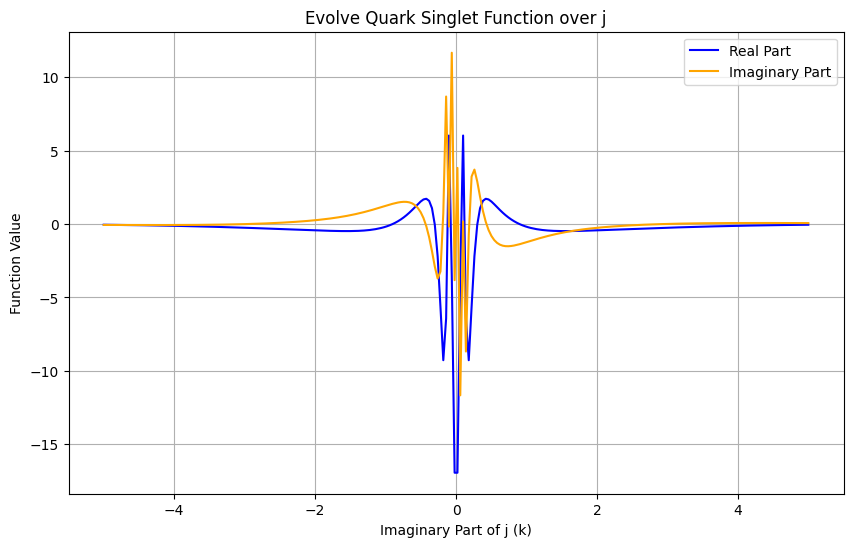

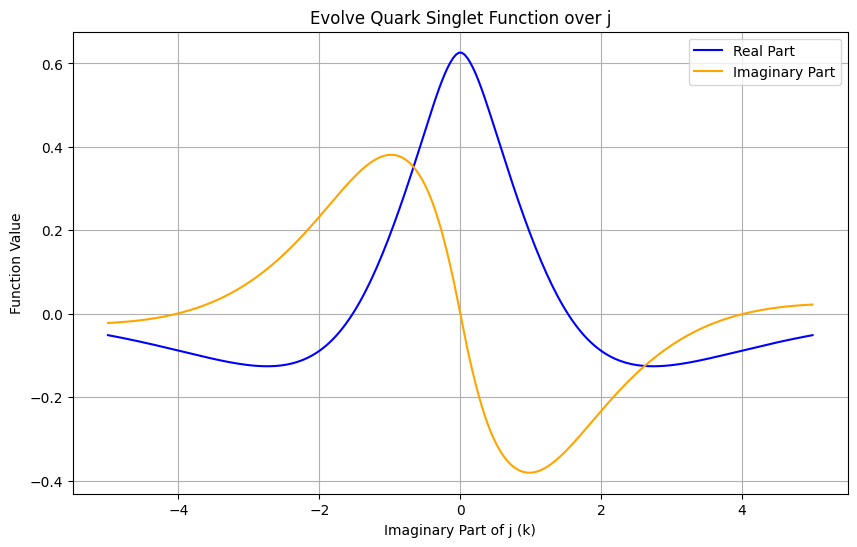

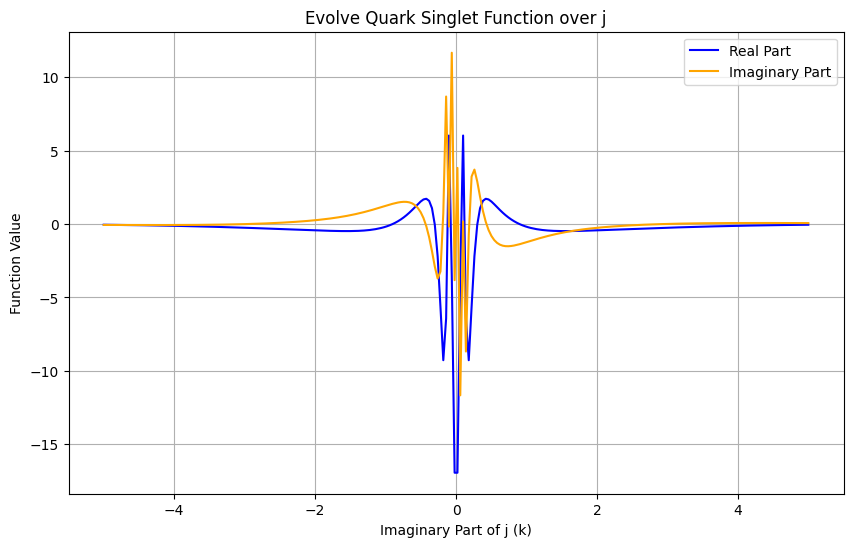

In [14]:
# Plot evolve_quark_singlet over imaginary j
def plot_j_evolve_quark_singlet(eta, t, mu,parity="even"):
    """
    Plots evolve_quark_singlet(j, eta, t, mu) over a complex domain of j.

    Parameters:
    - eta (float): Parameter for the evolve_quark_singlet function.
    - t (float): Parameter for the evolve_quark_singlet function.
    - mu (float): Parameter for the evolve_quark_singlet function.
    """
    if parity not in ["even","odd","none"]:
        raise ValueError("Parity must be even, odd or none")
    j_base = j_base_q(parity)

    # Generate j values: j = j_base + 1j * k where -10 <= k <= 10
    k_values = np.linspace(-5, 5, 250)
    j_values = j_base + 1j * k_values

    # Compute the function values in parallel
    results = Parallel(n_jobs=-1)(delayed(evolve_quark_singlet)(j, eta, t, mu,evolve_type = "vector") for j in j_values)

    # Separate the real and imaginary parts for plotting
    real_parts = [np.real(r) for r in results]
    imag_parts = [np.imag(r) for r in results]

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(k_values, real_parts, label='Real Part', color='blue')
    plt.plot(k_values, imag_parts, label='Imaginary Part', color='orange')

    plt.title('Evolve Quark Singlet Function over j')
    plt.xlabel('Imaginary Part of j (k)')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
eta = 1/3
t = -1e-2
mu = 2
plot_j_evolve_quark_singlet(eta, t, mu,"even")
plot_j_evolve_quark_singlet(eta, t, mu,"odd")
plot_j_evolve_quark_singlet(eta, t, mu,"none")

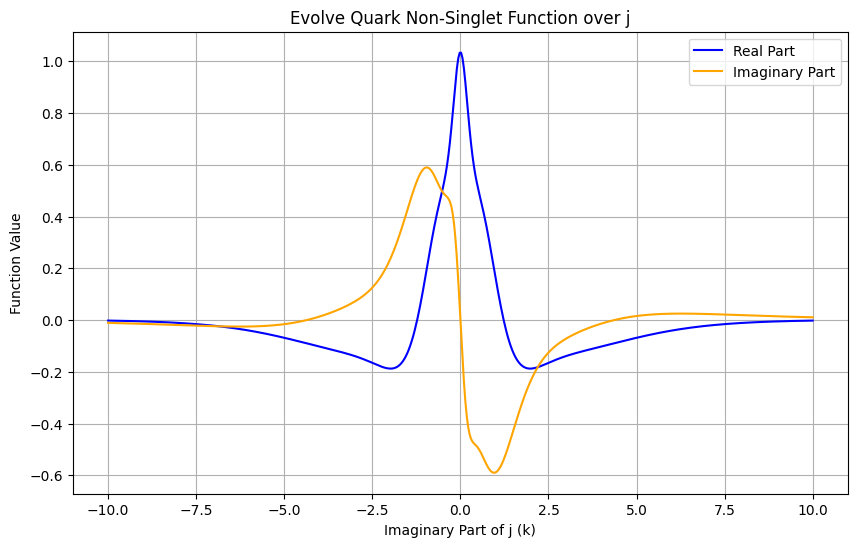

In [15]:
# Plot evolve_quark_non_singlet over imaginary j
def plot_j_evolve_quark_non_singlet(eta, t, mu):
    """
    Plots evolve_quark_singlet(j, eta, t, mu) over a complex domain of j.

    Parameters:
    - eta (float): Parameter for the evolve_quark_singlet function.
    - t (float): Parameter for the evolve_quark_singlet function.
    - mu (float): Parameter for the evolve_quark_singlet function.
    """

    j_base = 1

    # Generate j values: j = j_base + 1j * k where -10 <= k <= 10
    k_values = np.linspace(-10, 10, 500)
    j_values = j_base + 1j * k_values

    # Compute the function values in parallel
    results = Parallel(n_jobs=-1)(delayed(evolve_quark_non_singlet)(j,eta,t,mu,evolve_type = "NonSingletIsovector") for j in j_values)

    # Separate the real and imaginary parts for plotting
    real_parts = [np.real(r) for r in results]
    imag_parts = [np.imag(r) for r in results]

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(k_values, real_parts, label='Real Part', color='blue')
    plt.plot(k_values, imag_parts, label='Imaginary Part', color='orange')

    plt.title('Evolve Quark Non-Singlet Function over j')
    plt.xlabel('Imaginary Part of j (k)')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
eta = 1/3
t = 1e-2
mu = 2
plot_j_evolve_quark_non_singlet(eta, t, mu)


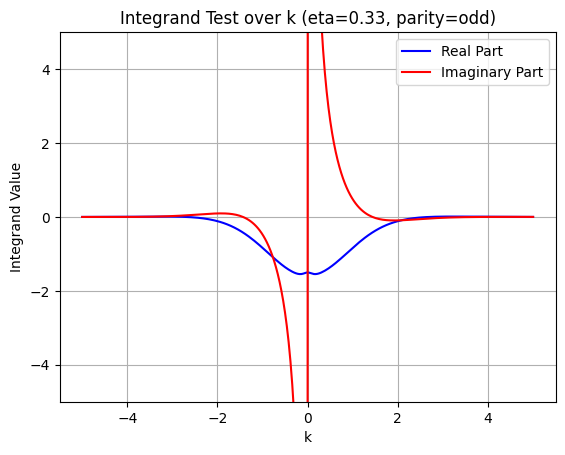

In [8]:
# Parallelize the function over k values with eta as a parameter
def parallel_integrand(k_values, eta, parity="even"):
    # Example parameters (replace with actual values)
    x = 0.1
    t = -1e-2
    mu = 2
    Nf = 3
    evolve_type = "vector"
    error_type = "central"
    results = Parallel(n_jobs=-1)(
        delayed(integrand_test)(k, x, eta, t, mu, Nf, evolve_type, parity, error_type) for k in k_values
    )
    return np.array(results)

# Define a plotting function that takes eta as a parameter
def plot_integrand_over_k(eta, k_range=(-5, 5), num_points=250, parity="even"):
    k_values = np.linspace(k_range[0], k_range[1], num_points)
    results = parallel_integrand(k_values, eta, parity)

    # Plot the results
    plt.plot(k_values, results.real, label="Real Part", color="b")
    plt.plot(k_values, results.imag, label="Imaginary Part", color="r")
    plt.xlabel('k')
    plt.ylabel('Integrand Value')
    plt.title(f'Integrand Test over k (eta={eta:.2f}, parity={parity})')
    plt.grid(True)
    plt.legend()
    plt.ylim(-5, 5)
    plt.show()

    # Clean up
    del k_values, results

# Example usage
plot_integrand_over_k(eta=1/3, k_range=(-5, 5), num_points=250, parity="odd")


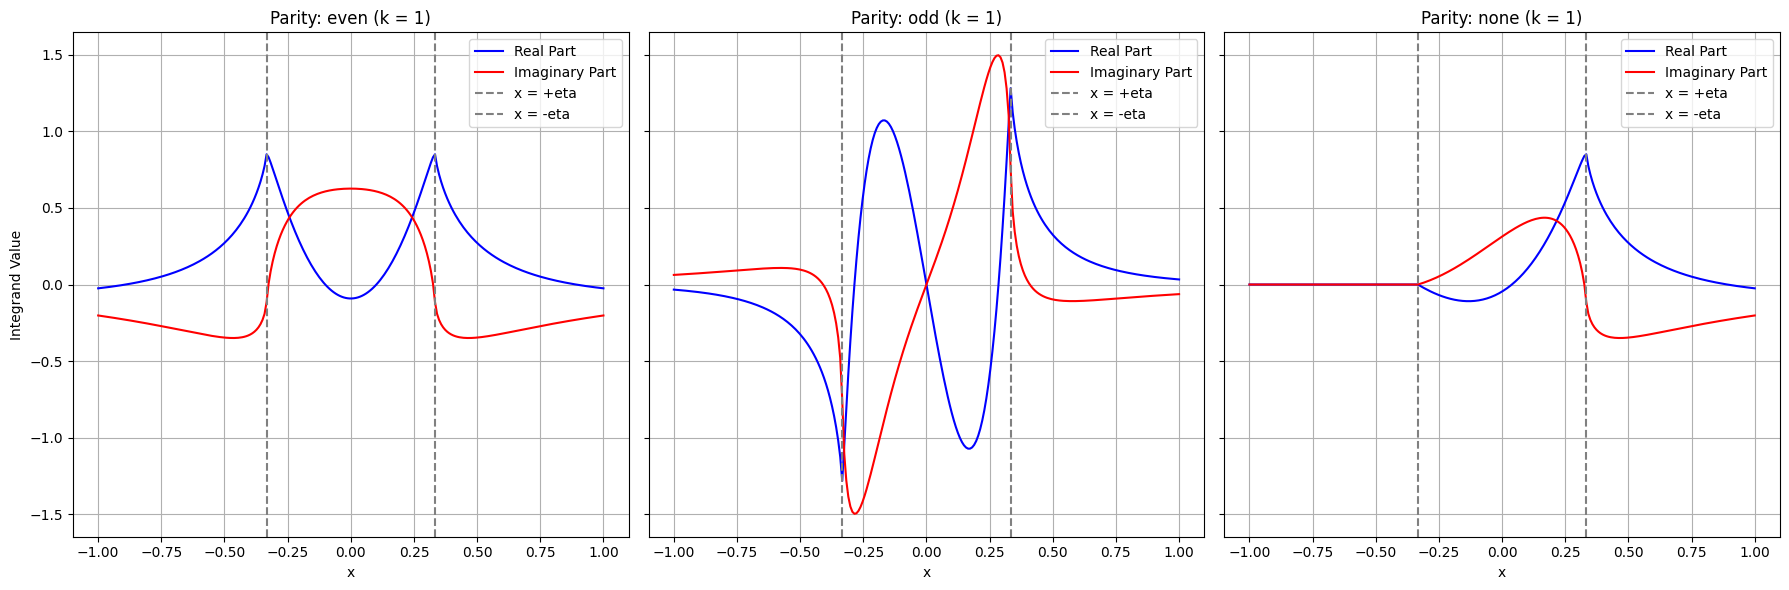

In [9]:
# Plot integrand over x
def integrand_test_x(x, k, eta, t, mu, Nf=3, evolve_type="vector", parity="even", error_type="central"):
    # Determine value on the real axis by parity assignment
    if parity not in ["even", "odd", "none"]:
        raise ValueError("Parity must be even, odd or none")
    j_base = j_base_q(parity)
    z = j_base + 1j * k
    dz = 1j
    pw_val = conformal_pw_q(z, x, eta, parity)
    mom_val = evolve_quark_singlet(z, eta, t, mu, Nf, evolve_type, error_type)
    result = -.5j * dz * pw_val * mom_val
    return np.complex128(result)

# Parallelize the function over x values
def parallel_integrand_x(x_values, eta, k=0, parity="even"):
    # Example parameters (replace with actual values)
    t = -1e-2
    mu = 2
    Nf = 3
    evolve_type = "vector"
    error_type = "central"
    results = Parallel(n_jobs=-1)(
        delayed(integrand_test_x)(x, k, eta, t, mu, Nf, evolve_type, parity, error_type) for x in x_values
    )
    return np.array(results)

# Plot integrand over x for all parities
def plot_integrand_all_parities(x_values, eta, k=0):
    # Define parities
    parities = ["even", "odd", "none"]
    num_parities = len(parities)

    # Create subplots for each parity
    fig, axes = plt.subplots(1, num_parities, figsize=(18, 6), sharey=True)

    for i, parity in enumerate(parities):
        # Parallel computation for the given parity
        results_x = parallel_integrand_x(x_values, eta, k=k, parity=parity)

        # Plot real and imaginary parts
        axes[i].plot(x_values, results_x.real, label="Real Part", color="b")
        axes[i].plot(x_values, results_x.imag, label="Imaginary Part", color="r")
        axes[i].axvline(x=eta, linestyle='--', color='gray', label='x = +eta')
        axes[i].axvline(x=-eta, linestyle='--', color='gray', label='x = -eta')
        axes[i].set_title(f'Parity: {parity} (k = {k})')
        axes[i].set_xlabel('x')
        axes[i].grid(True)
        if i == 0:
            axes[i].set_ylabel('Integrand Value')  # Add y-axis label to the first plot
        axes[i].legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


# Example usage
x_values = np.linspace(-1, 1, 250)
k_fixed = 1  # Fix k value
eta_fixed = 1 / 3

# Call the function to plot for all parities
plot_integrand_all_parities(x_values, eta_fixed, k=k_fixed)

# Clean up
del x_values



Mellin-Barnes Integral

In [91]:
# Mellin-Barnes integral with parallelization over k-values
def mellin_barnes_singlet_q(x, eta, t, mu, Nf=3, error_type="central",real_imag ="real",j_max = 7.5, n_jobs=-1):
    """
    Numerically evaluate the Mellin-Barnes integral parallel to the imaginary axis
    
    Parameters:
    - x (float): Parton x
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <=3 ): Number of flavors
    - error_type (str): value of input PDFs (central, plus, minus)
    - real_imag (str): Choose to compute real part, imaginary part or both
    - j_max (float): Integration range parallel to the imaginary axis
    - n_jobs (int): Number of subregions, and thus processes, the integral is split into
    - n_k (int): Number of sampling points within the interval [-j_max,j_max]
    
    Returns: 
    - The value of the Mellin barnes integral with real and imaginary part.
    """
    # Scale fixed by it's value at the input scale:
    # print(mellin_barnes_singlet_q(7.5,1e-3,0,-1e-3,1))
    # print(uv_PDF(1e-3)+dv_PDF(1e-3)+Sv_PDF(1e-3))
    # 1621.495208864428
    # 1781.609324344485
    norm = 1781.609324344485/1621.495208864428
    epsilon = 1e-3
    if eta == 0: # Avoid division by zero in the Q partial wave
        eta = 1e-4
    # Integrand function which returns both real and imaginary parts
    def integrand_real(k):
        z = j_base + 1j * k
        dz = 1j
        sin_term = mp.sin(np.pi * z)
        pw_val = conformal_pw_q(z, x, eta, parity=parity)
        mom_val = evolve_quark_singlet(z,eta,t,mu,Nf=Nf,evolve_type="vector",error_type= error_type)
        result = -.5j * dz * pw_val * mom_val / sin_term
        return result.real
    
    def integrand_imag(k):
        z = j_base+ 1j * k
        dz = 1j
        sin_term = mp.sin(np.pi * z)
        pw_val = conformal_pw_q(z, x, eta, parity=parity)
        mom_val = evolve_quark_singlet(z,eta,t,mu,Nf=Nf,evolve_type="vector",error_type= error_type)
        result = -.5j * dz * pw_val * mom_val / sin_term
        return result.imag

    # Function to integrate over a subinterval of k and extract real and imaginary parts
    def integrate_subinterval(k_values):
        k_min = k_values[0]
        k_max = k_values[-1]
        
        # Integrate real and imaginary parts using quad
        if real_imag == "real":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            return real_part, real_error
        elif real_imag == "imag":   
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return imag_part, imag_error
        elif real_imag == "both":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return real_part, real_error, imag_part, imag_error 
        else :
            raise ValueError("real_imag must be either real, imag or both")

    parity = "odd"
    j_base = j_base_q(parity) - epsilon

    # Define the number of subintervals (equal to n_jobs)
    n_subintervals = n_jobs if n_jobs > 0 else os.cpu_count()  # Default to all cores if n_jobs isn't specified
    k_range = np.linspace(-j_max, j_max, n_subintervals + 1) # Generate an array that when split into n_subintervals contains k_min and k_max
    k_values_split = []
    # Split the range into equal subintervals
    for i in range(n_subintervals):
        k_values_split.append(k_range[i:i+2])
    # Print the subintervals to verify
    # for i in range(len(k_values_split)):
    #     print(k_values_split[i])    
    # Parallelize the integration over the subintervals of k
    results = Parallel(n_jobs=n_subintervals)(
        delayed(integrate_subinterval)(k_values_split[i]) for i in range(n_subintervals)
    )

    if real_imag == "both":
        real_integral = sum(result[0] for result in results)
        real_error = np.sqrt(sum(result[1]**2 for result in results))
        imag_integral = sum(result[2] for result in results)
        imag_error = np.sqrt(sum(result[3]**2 for result in results))
        integral = real_integral +1j * imag_integral
        error = real_error + 1j * imag_error
    else :
    # Sum the results from all subintervals for real and imaginary parts, and accumulate the errors
        integral = sum(result[0] for result in results)
        error = np.sqrt(sum(result[1]**2 for result in results))

    # Check for the estimated error
    if np.abs(error) > 1e-3:
        print(f"Warning: Large error estimate: {error}")
    return norm * integral



# Mellin-Barnes integral with parallelization over k-values
def mellin_barnes_non_singlet_q(x, eta, t, mu, Nf=3, error_type="central",real_imag ="real",j_max = 7.5, n_jobs=-1):
    """
    Numerically evaluate the Mellin-Barnes integral parallel to the imaginary axis
    
    Parameters:
    - x (float): Parton x
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <=3 ): Number of flavors
    - error_type (str): value of input PDFs (central, plus, minus)
    - real_imag (str): Choose to compute real part, imaginary part or both
    - j_max (float): Integration range parallel to the imaginary axis
    - n_jobs (int): Number of subregions, and thus processes, the integral is split into
    - n_k (int): Number of sampling points within the interval [-j_max,j_max]
    
    Returns: 
    - The value of the Mellin barnes integral with real and imaginary part.
    """
    # print(mellin_barnes_non_singlet_q(7.5,1e-3,0,-1e-3,1))
    # print(uv_PDF(1e-3)-dv_PDF(1e-3))
    # 28.04122982081713
    # 28.164212232271677
    norm = 28.164212232271677/28.04122982081713
    epsilon = 1e-3
    if eta == 0: # Avoid division by zero in the Q partial wave
        eta = 1e-4
    # Integrand function which returns both real and imaginary parts
    def integrand_real(k):
        z = j_base + 1j * k
        dz = 1j
        sin_term = np.sin(np.pi * z)
        pw_val = conformal_pw_q(z, x, eta, parity=parity)
        mom_val = evolve_quark_non_singlet(z,eta,t,mu,Nf=Nf,evolve_type="NonSingletIsovector",error_type= error_type)
        result = -.5j * dz * pw_val * mom_val / sin_term
        return result.real
    
    def integrand_imag(k):
        z = j_base+ 1j * k
        dz = 1j
        sin_term = mp.sin(np.pi * z)
        pw_val = conformal_pw_q(z, x, eta, parity=parity)
        mom_val = evolve_quark_non_singlet(z,eta,t,mu,Nf=Nf,evolve_type="NonSingletIsovector",error_type= error_type)
        result = -.5j * dz * pw_val * mom_val / sin_term
        return result.imag

    # Function to integrate over a subinterval of k and extract real and imaginary parts
    def integrate_subinterval(k_values):
        k_min = k_values[0]
        k_max = k_values[-1]
        
        # Integrate real and imaginary parts using quad
        if real_imag == "real":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            return real_part, real_error
        elif real_imag == "imag":   
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return imag_part, imag_error
        elif real_imag == "both":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return real_part, real_error, imag_part, imag_error 
        else :
            raise ValueError("real_imag must be either real, imag or both")

    parity = "none"
    j_base = j_base_q(parity) - epsilon

    # Define the number of subintervals (equal to n_jobs)
    n_subintervals = n_jobs if n_jobs > 0 else os.cpu_count()  # Default to all cores if n_jobs isn't specified
    k_range = np.linspace(-j_max, j_max, n_subintervals + 1) # Generate an array that when split into n_subintervals contains k_min and k_max
    k_values_split = []
    # Split the range into equal subintervals
    for i in range(n_subintervals):
        k_values_split.append(k_range[i:i+2])
    # Print the subintervals to verify
    # for i in range(len(k_values_split)):
    #     print(k_values_split[i])    
    # Parallelize the integration over the subintervals of k
    results = Parallel(n_jobs=n_subintervals)(
        delayed(integrate_subinterval)(k_values_split[i]) for i in range(n_subintervals)
    )

    if real_imag == "both":
        real_integral = sum(result[0] for result in results)
        real_error = np.sqrt(sum(result[1]**2 for result in results))
        imag_integral = sum(result[2] for result in results)
        imag_error = np.sqrt(sum(result[3]**2 for result in results))
        integral = real_integral +1j * imag_integral
        error = real_error + 1j * imag_error
    else :
    # Sum the results from all subintervals for real and imaginary parts, and accumulate the errors
        integral = sum(result[0] for result in results)
        error = np.sqrt(sum(result[1]**2 for result in results))

    # Check for the estimated error
    if np.abs(error) > 1e-3:
        print(f"Warning: Large error estimate: {error}")
    return norm * integral

# Mellin-Barnes integral with parallelization over k-values
def mellin_barnes_gluon(x, eta, t, mu, Nf=3, error_type="central",real_imag ="real",j_max = 7.5, n_jobs=-1):
    """
    Numerically evaluate the Mellin-Barnes integral parallel to the imaginary axis
    
    Parameters:
    - x (float): Parton x
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <=3 ): Number of flavors
    - error_type (str): value of input PDFs (central, plus, minus)
    - real_imag (str): Choose to compute real part, imaginary part or both
    - j_max (float): Integration range parallel to the imaginary axis
    - n_jobs (int): Number of subregions, and thus processes, the integral is split into
    - n_k (int): Number of sampling points within the interval [-j_max,j_max]
    
    Returns: 
    - The value of the Mellin barnes integral with real and imaginary part.
    """
    # Fix to gluon PDF at input scale:
    # print(mellin_barnes_gluon(.5,0,-1e-4,1))
    # print(gluon_PDF(.5))
    # 0.3979123333698537
    # 0.5802167259902921
    norm = 0.5802167259902921/0.3979123333698537
    epsilon = 1e-3
    if eta == 0: # Avoid division by zero in the Q partial wave
        eta = 1e-4
    # Integrand function which returns both real and imaginary parts
    def integrand_real(k):
        z = j_base + 1j * k
        dz = 1j
        sin_term = mp.sin(np.pi * z)
        pw_val = conformal_pw_g(z, x, eta, parity=parity)
        mom_val = evolve_gluon(z,eta,t,mu,Nf=Nf,evolve_type="vector",error_type= error_type)
        result = .5j * dz * pw_val * mom_val / sin_term
        return result.real
    
    def integrand_imag(k):
        z = j_base+ 1j * k
        dz = 1j
        sin_term = mp.sin(np.pi * z)
        pw_val = conformal_pw_g(z, x, eta, parity=parity)
        mom_val = evolve_gluon(z,eta,t,mu,Nf=Nf,evolve_type="vector",error_type= error_type)
        result = .5j * dz * pw_val * mom_val / sin_term
        return result.imag

    # Function to integrate over a subinterval of k and extract real and imaginary parts
    def integrate_subinterval(k_values):
        k_min = k_values[0]
        k_max = k_values[-1]
        
        # Integrate real and imaginary parts using quad
        if real_imag == "real":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            return real_part, real_error
        elif real_imag == "imag":   
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return imag_part, imag_error
        elif real_imag == "both":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return real_part, real_error, imag_part, imag_error 
        else :
            raise ValueError("real_imag must be either real, imag or both")

    parity = "even"
    j_base = j_base_q(parity) - epsilon

    # Define the number of subintervals (equal to n_jobs)
    n_subintervals = n_jobs if n_jobs > 0 else os.cpu_count()  # Default to all cores if n_jobs isn't specified
    k_range = np.linspace(-j_max, j_max, n_subintervals + 1) # Generate an array that when split into n_subintervals contains k_min and k_max
    k_values_split = []
    # Split the range into equal subintervals
    for i in range(n_subintervals):
        k_values_split.append(k_range[i:i+2])
    # Print the subintervals to verify
    # for i in range(len(k_values_split)):
    #     print(k_values_split[i])    
    # Parallelize the integration over the subintervals of k
    results = Parallel(n_jobs=n_subintervals)(
        delayed(integrate_subinterval)(k_values_split[i]) for i in range(n_subintervals)
    )

    if real_imag == "both":
        real_integral = sum(result[0] for result in results)
        real_error = np.sqrt(sum(result[1]**2 for result in results))
        imag_integral = sum(result[2] for result in results)
        imag_error = np.sqrt(sum(result[3]**2 for result in results))
        integral = real_integral +1j * imag_integral
        error = real_error + 1j * imag_error
    else :
    # Sum the results from all subintervals for real and imaginary parts, and accumulate the errors
        integral = sum(result[0] for result in results)
        error = np.sqrt(sum(result[1]**2 for result in results))

    # Check for the estimated error
    if np.abs(error) > 1e-3:
        print(f"Warning: Large error estimate: {error}")
    return norm * integral

In [111]:
def plot_mellin_barnes_singlet_q(eta, t, mu, Nf=3, real_imag="real", sampling=True, n_init=10, n_points=20, x_0=1e-2, x_1=1, error_bars=True):
    """
    Plot the real or imaginary part of the singlet quark GPD
    with dynamically adjusted x intervals, including error bars.
    The function supports both positive and negative values of parton x.

    Parameters:
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <= 4): Number of flavors
    - real_imag (str): Choose to plot real part, imaginary part or both. Imaginary part should be zero, so this is just for checks.
    - sampling (True or False): Choose whether to plot using importance sampling  
    - n_init (int): Sampling size
    - n_points (int): Number of plot points
    - x_0 (float): lower bound on parton x
    - x_1 (float): upper bound on parton x
    - error_bars (True or False): Compute error bars as well
    """
    # Ensure x_0 < x_1 for a valid range
    if x_0 >= x_1:
        raise ValueError("x_0 must be less than x_1.")

    if x_0 <= 0:
        raise ValueError("x_0 must be greater than zero.")

    def compute_result(x, error_type="central"):
        return mellin_barnes_singlet_q(x, eta, t, mu, Nf, real_imag=real_imag, error_type=error_type,n_jobs=1)

    if sampling:
        x_values = np.linspace(x_0, x_1, n_init)

        # Measure time for sampling initial points
        start_time_sampling = time.time()
        results = Parallel(n_jobs=-1)(delayed(compute_result)(x) for x in x_values)
        end_time_sampling = time.time()

        # Compute differences and scale intervals
        diffs = np.abs(np.diff(results))
        scaled_intervals = diffs / np.sum(diffs)
        cumulative_intervals = np.cumsum(np.insert(scaled_intervals, 0, 0))

        # Output sampling time
        print(f"Time for initial sampling: {end_time_sampling - start_time_sampling:.6f} seconds")

    # Measure time for adaptive grid computation
    start_time_adaptive = time.time()
    if sampling:
        x_values = np.interp(np.linspace(0, 1, n_points), cumulative_intervals, x_values)
    else:
        x_values = np.linspace(x_0, x_1, n_points)

    results = Parallel(n_jobs=-1)(delayed(compute_result)(x) for x in x_values)

    # Error bar computations
    if error_bars:
        results_plus = Parallel(n_jobs=-1)(delayed(compute_result)(x, error_type="plus") for x in x_values)
        results_minus = Parallel(n_jobs=-1)(delayed(compute_result)(x, error_type="minus") for x in x_values)
    else:
        results_plus = results
        results_minus = results

    end_time_adaptive = time.time()

    # Extract real and imaginary parts of results
    real_parts = np.real(results)
    imag_parts = np.imag(results)

    # Compute real and imaginary error bars
    real_errors_plus = abs(np.real(results_plus) - real_parts)
    real_errors_minus = abs(real_parts - np.real(results_minus))
    imag_errors_plus = abs(np.imag(results_plus) - imag_parts)
    imag_errors_minus = abs(imag_parts - np.imag(results_minus))

    # Output plot generation time
    print(f"Time for plot computation: {end_time_adaptive - start_time_adaptive:.6f} seconds")

    # Define the data and labels for real and imaginary parts
    plot_parts = [
        ("real", real_parts, real_errors_minus, real_errors_plus, 'b', 'Singlet Sea Quark GPD'),
        ("imag", imag_parts, imag_errors_minus, imag_errors_plus, 'r', 'Imaginary Part of Singlet Sea Quark GPD')
    ]

    # Plot real and/or imaginary parts
    for part, data, errors_minus, errors_plus, color, title in plot_parts:
        if real_imag in (part, "both"):
            if error_bars:
                plt.errorbar(
                    x_values, data,
                    yerr=(errors_minus, errors_plus),
                    fmt='o', label=(f"$\\eta={eta:.2f}$"
                                    "\n"
                                    f"$t={t:.2f} \\text{{ GeV}}^2$"
                                    "\n"
                                    f"$\\mu = {mu} \\text{{ GeV}}$"),
                    color=color, capsize=3
                )
            else:
                plt.scatter(
                    x_values, data,
                    label=(f"$\\eta={eta:.2f}$"
                                "\n"
                                f"$t={t:.2f} \\text{{ GeV}}^2$"
                                "\n"
                                f"$\\mu = {mu} \\text{{ GeV}}$"),
                    color=color
                )

    # Set the title based on real_imag
    if real_imag == "real":
        plt.title('Singlet Sea Quark GPD')
    elif real_imag == "imag":
        plt.title('Imaginary Part of Singlet Sea Quark GPD')
    elif real_imag == "both":
        plt.title('Real and Imaginary Part of Singlet Sea Quark GPD')

    # Add vertical lines to separate DGLAP from ERBL region
    plt.axvline(x=eta, linestyle='--')   
    plt.axvline(x=-eta, linestyle='--')

    plt.xlim(x_0, x_1)
    plt.xlabel('x')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_mellin_barnes_non_singlet_q(eta, t, mu, Nf=3, real_imag="real", sampling=True, n_init=10, n_points=30, x_0=-1, x_1=1, error_bars=True):
    """
    Plot the real or imaginary part of the non-singlet quark GPD
    with dynamically adjusted x intervals, including error bars.
    The function supports both positive and negative values of parton x.

    Parameters:
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <= 4): Number of flavors
    - real_imag (str): Choose to plot real part, imaginary part or both. Imaginary part should be zero, so this is just for checks.
    - sampling (True or False): Choose whether to plot using importance sampling 
    - n_init (int): Sampling size
    - n_points (int): Number of plot points
    - x_0 (float): lower bound on parton x
    - x_1 (float): upper bound on parton x
    - error_bars (True or False): Compute error bars as well
    """
    # Ensure x_0 < x_1 for a valid range
    if x_0 >= x_1:
        raise ValueError("x_0 must be less than x_1.")

    # Validate real_imag input
    if real_imag not in ("real", "imag", "both"):
        raise ValueError("Invalid option for real_imag. Choose from 'real', 'imag', or 'both'.")

    def compute_result(x, error_type="central"):
        return mellin_barnes_non_singlet_q(x, eta, t, mu, Nf, real_imag=real_imag, error_type=error_type, n_jobs=1)

    if sampling:
        x_values = np.linspace(x_0, x_1, n_init)

        # Measure time for sampling initial points
        start_time_sampling = time.time()
        results = Parallel(n_jobs=-1)(delayed(compute_result)(x) for x in x_values)
        end_time_sampling = time.time()

        # Compute differences and scale intervals
        diffs = np.abs(np.diff(results))
        scaled_intervals = diffs / np.sum(diffs)
        cumulative_intervals = np.cumsum(np.insert(scaled_intervals, 0, 0))

        # Output sampling time
        print(f"Time for initial sampling: {end_time_sampling - start_time_sampling:.6f} seconds")

    # Measure time for adaptive grid computation
    start_time_adaptive = time.time()
    if sampling:
        x_values = np.interp(np.linspace(0, 1, n_points), cumulative_intervals, x_values)
    else:
        x_values = np.linspace(x_0, x_1, n_points)

    results = Parallel(n_jobs=-1)(delayed(compute_result)(x) for x in x_values)

    # Error bar computations
    if error_bars:
        results_plus = Parallel(n_jobs=-1)(delayed(compute_result)(x, error_type="plus") for x in x_values)
        results_minus = Parallel(n_jobs=-1)(delayed(compute_result)(x, error_type="minus") for x in x_values)
    else:
        results_plus = results
        results_minus = results

    end_time_adaptive = time.time()

    # Extract real and imaginary parts of results
    real_parts = np.real(results)
    imag_parts = np.imag(results)

    # Compute real and imaginary error bars
    real_errors_plus = abs(np.real(results_plus) - real_parts)
    real_errors_minus = abs(real_parts - np.real(results_minus))
    imag_errors_plus = abs(np.imag(results_plus) - imag_parts)
    imag_errors_minus = abs(imag_parts - np.imag(results_minus))

    # Output plot generation time
    print(f"Time for plot computation: {end_time_adaptive - start_time_adaptive:.6f} seconds")

    # Define the data and labels for real and imaginary parts
    plot_parts = [
        ("real", real_parts, real_errors_minus, real_errors_plus, 'b', 'Non-Singlet Quark GPD'),
        ("imag", imag_parts, imag_errors_minus, imag_errors_plus, 'r', 'Imaginary Part of Non-Singlet Quark GPD')
    ]


    # Plot real and/or imaginary parts
    for part, data, errors_minus, errors_plus, color, title in plot_parts:
        if real_imag in (part, "both"):
            if error_bars:
                plt.errorbar(
                    x_values, data,
                    yerr=(errors_minus, errors_plus),
                    fmt='o', label=(f"$\\eta={eta:.2f}$"
                                    "\n"
                                    f"$t={t:.2f} \\text{{ GeV}}^2$"
                                    "\n"
                                    f"$\\mu = {mu} \\text{{ GeV}}$"),
                    color=color, capsize=3
                )
            else:
                plt.scatter(
                    x_values, data,
                    label=(f"$\\eta={eta:.2f}$"
                                "\n"
                                f"$t={t:.2f} \\text{{ GeV}}^2$"
                                "\n"
                                f"$\\mu = {mu} \\text{{ GeV}}$"),
                    color=color
                )

    # Set the title based on real_imag
    if real_imag == "real":
        plt.title('Non-Singlet Quark GPD')
    elif real_imag == "imag":
        plt.title('Imaginary Part of Non-Singlet Quark GPD')
    elif real_imag == "both":
        plt.title('Real and Imaginary Part of Non-Singlet Quark GPD')

    # Add vertical lines to separate DGLAP from ERBL region
    plt.axvline(x=eta, linestyle='--')   
    plt.axvline(x=-eta, linestyle='--')

    plt.xlim(x_0, x_1)
    plt.xlabel('x')
    plt.legend()
    plt.grid(True)
    plt.show()
    
#################
###   TO DO   ###
#################
def plot_mellin_barnes_gluon(eta, t, mu, Nf =3, real_imag="real", sampling = True, n_init=10, n_points=30, x_0=1e-2, x_1=1, error_bars = True):
    """
    Plot the real or imaginary part of the non-singlet quark GPD
    with dynamically adjusted x intervals, including error bars.
    The function supports both positive and negative values of parton x.

    Parameters:
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <= 4): Number of flavors
    - real_imag (str): Choose to plot real part, imaginary part or both. Imaginary part should be zero, so this is just for checks.
    - sampling (True or False): Choose whether to plot using importance sampling 
    - n_init (int): Sampling size
    - n_points (int): Number of plot points
    - x_0 (float): lower bound on parton x
    - x_1 (float): upper bound on parton x
    - error_bars (True or False): Computer error bars as well
    """
    # Ensure x_0 < x_1 for a valid range
    if x_0 >= x_1:
        raise ValueError("x_0 must be less than x_1.")
    if x_0 <= 0:
        raise ValueError("x_0 must be greater than zero.")
    
    # Validate real_imag input
    if real_imag not in ("real", "imag", "both"):
        raise ValueError("Invalid option for real_imag. Choose from 'real', 'imag', or 'both'.")

    if sampling:
        x_values = np.linspace(x_0, x_1, n_init)

        # Measure time for sampling initial points
        start_time_sampling = time.time()
        results = [mellin_barnes_gluon(x, eta, t, mu, Nf, real_imag=real_imag) for x in x_values]
        end_time_sampling = time.time()

        # Compute differences and scale intervals
        diffs = np.abs(np.diff(results))
        scaled_intervals = diffs / np.sum(diffs)
        cumulative_intervals = np.cumsum(np.insert(scaled_intervals, 0, 0))

        # Output sampling time
        print(f"Time for initial sampling: {end_time_sampling - start_time_sampling:.6f} seconds")

    # Measure time for adaptive grid computation
    start_time_adaptive = time.time()
    if sampling:
        x_values = np.interp(np.linspace(0, 1, n_points), cumulative_intervals, x_values)
    else:
        x_values = np.linspace(x_0, x_1, n_points)

    results = [mellin_barnes_gluon(x, eta, t, mu, Nf,real_imag=real_imag) for x in x_values]
    if error_bars:
        results_plus = [mellin_barnes_gluon(x, eta, t, mu, Nf, real_imag=real_imag, error_type="plus") for x in x_values]
        results_minus = [mellin_barnes_gluon(x, eta, t, mu, Nf, real_imag=real_imag, error_type="minus") for x in x_values]
    else :
        results_plus = results
        results_minus = results
    end_time_adaptive = time.time()

    # Extract real and imaginary parts of results
    real_parts = np.real(results)
    imag_parts = np.imag(results)

    # Compute real and imaginary error bars
    real_errors_plus = abs(np.real(results_plus) - real_parts)
    real_errors_minus = abs(real_parts - np.real(results_minus))
    imag_errors_plus = abs(np.imag(results_plus) - imag_parts)
    imag_errors_minus = abs(imag_parts - np.imag(results_minus))

    # Output plot generation time
    print(f"Time for plot computation: {end_time_adaptive - start_time_adaptive:.6f} seconds")

    # Define the data and labels for real and imaginary parts
    plot_parts = [
        ("real", real_parts, real_errors_minus, real_errors_plus, 'b', 'Singlet Gluon GPD'),
        ("imag", imag_parts, imag_errors_minus, imag_errors_plus, 'r', 'Imaginary Part of Singlet Gluon GPD')
    ]

    # Plot real and/or imaginary parts
    for part, data, errors_minus, errors_plus, color, title in plot_parts:
        if real_imag in (part, "both"):
            if error_bars:
                plt.errorbar(
                    x_values, data,
                    yerr=(errors_minus, errors_plus),
                    fmt='o', label=(f"$\eta={eta:.2f}$"
                                    "\n"
                                    f"$t={t:.2f} \\text{{ GeV}}^2$"
                                    "\n"
                                    f"$\\mu = {mu} \\text{{ GeV}}$"),
                    color=color, capsize=3
                )
            else:
                plt.scatter(
                    x_values, data,
                    label=(f"$\eta={eta:.2f}$"
                                "\n"
                                f"$t={t:.2f} \\text{{ GeV}}^2$"
                                "\n"
                                f"$\\mu = {mu} \\text{{ GeV}}$"),
                    color=color
                )

    # Set the title based on real_imag
    if real_imag == "real":
        plt.title('Singlet Gluon GPD')
    elif real_imag == "imag":
        plt.title('Imaginary Part of Singlet Gluon GPD')
    elif real_imag == "both":
        plt.title('Real and Imaginary Part of Singlet Gluon GPD')

    # Add vertical lines to separate DGLAP from ERBL region
    plt.axvline(x = eta, linestyle = '--')   
    plt.axvline(x = -eta, linestyle = '--')

    plt.xlim(x_0, x_1)
    plt.xlabel('x')
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
def uv_minus_dv_PDF(x,error_type="central"):
    result = uv_PDF(x,error_type)-dv_PDF(x,error_type)
    return result
vectorized_uv_minus_dv_PDF = np.vectorize(uv_minus_dv_PDF)

def plot_uv_minus_dv_PDF():
    x_vals = np.linspace(1e-2,1,100)
    y_vals = vectorized_uv_minus_dv_PDF(x_vals)
    y_vals_plus = abs(vectorized_uv_minus_dv_PDF(x_vals,"plus") - y_vals)
    y_vals_minus = abs(y_vals - vectorized_uv_minus_dv_PDF(x_vals,"minus"))

    plt.errorbar(
            x_vals, y_vals,
            yerr=(y_vals_minus, y_vals_plus),
            fmt='o')
    plt.grid(True)
    plt.show()

def uv_plus_dv_plus_S_PDF(x,error_type="central"):
    result = uv_PDF(x,error_type) + dv_PDF(x,error_type) + Sv_PDF(x,error_type)
    return result
vectorized_uv_plus_dv_plus_S_PDF = np.vectorize(uv_plus_dv_plus_S_PDF)

def plot_uv_plus_dv_plus_S_PDF():
    x_vals = np.linspace(1e-2,1,100)
    y_vals = vectorized_uv_plus_dv_plus_S_PDF(x_vals)
    y_vals_plus = abs(vectorized_uv_plus_dv_plus_S_PDF(x_vals,"plus") - y_vals)
    y_vals_minus = abs(y_vals - vectorized_uv_plus_dv_plus_S_PDF(x_vals,"minus"))

    plt.errorbar(
            x_vals, y_vals,
            yerr=(y_vals_minus, y_vals_plus),
            fmt='o')
    plt.grid(True)
    plt.show()

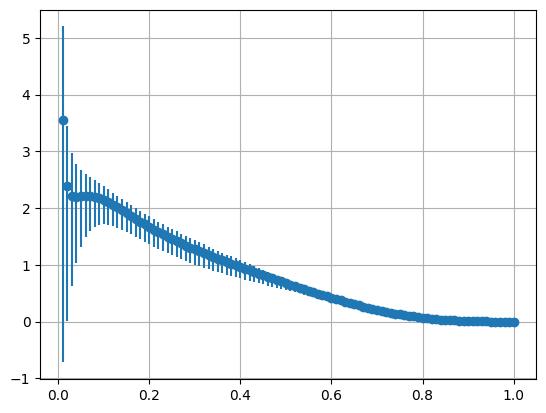

In [94]:
plot_uv_minus_dv_PDF()

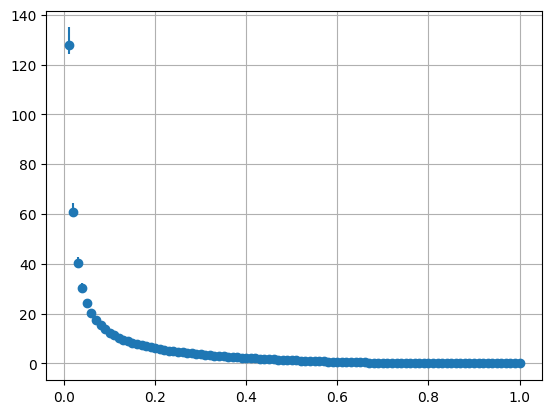

In [95]:
plot_uv_plus_dv_plus_S_PDF()

Time for initial sampling: 1.805488 seconds
Time for plot computation: 15.749286 seconds


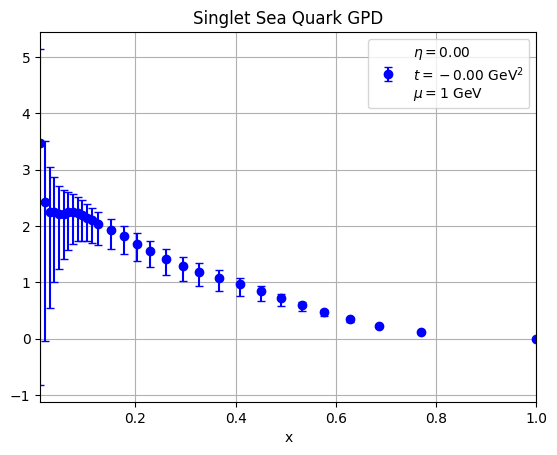

In [68]:
plot_mellin_barnes_non_singlet_q(0,-1e-4,1,x_0=1e-2)

Time for initial sampling: 11.344264 seconds
Time for plot computation: 30.944115 seconds


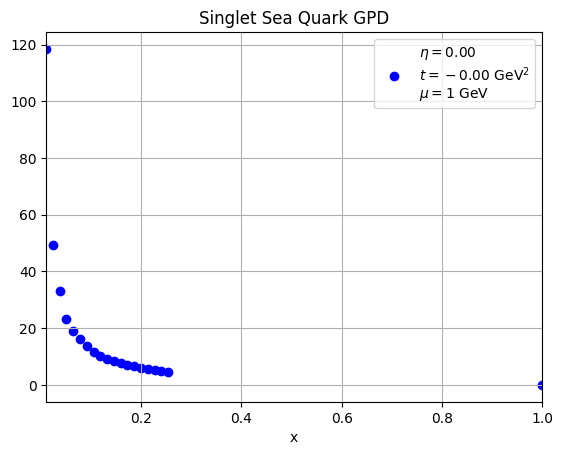

In [96]:
# Parallelized data generation
plot_mellin_barnes_singlet_q(0,-1e-4,1,x_0=1e-2,sampling=True,n_init=5,error_bars=False,n_points=20)

Time for initial sampling: 10.739504 seconds
Time for plot computation: 58.623837 seconds


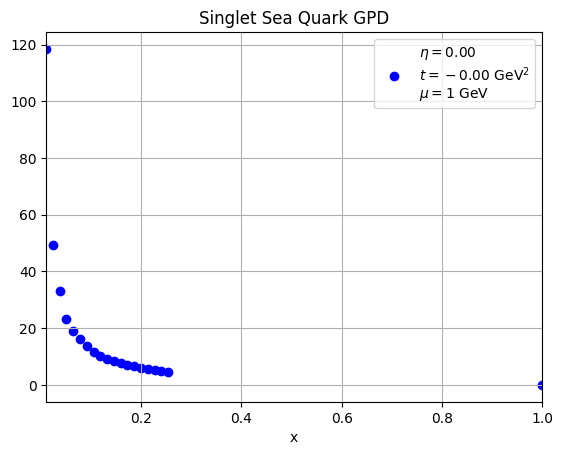

In [71]:
# Parallelized integral
plot_mellin_barnes_singlet_q(0,-1e-4,1,x_0=1e-2,sampling=True,n_init=5,error_bars=False,n_points=20)

Time for initial sampling: 1.189169 seconds
Time for plot computation: 28.412901 seconds


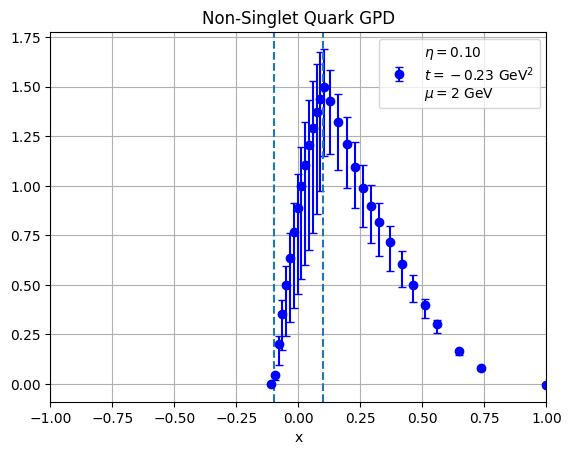

In [103]:
# Parallelized Data generation
plot_mellin_barnes_non_singlet_q(.1,-0.23,2,3)

Time for initial sampling: 1.588089 seconds
Time for plot computation: 53.254772 seconds


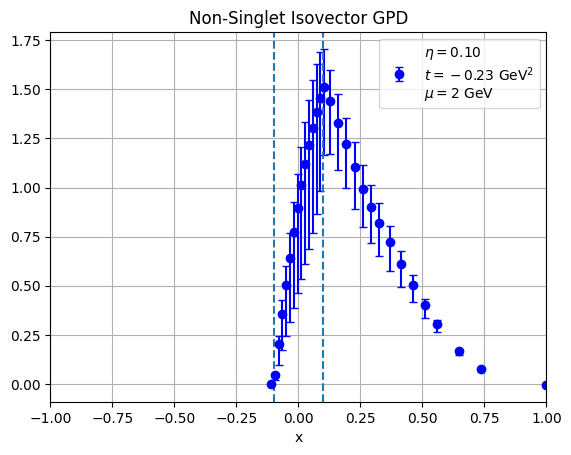

In [ ]:
# Parallelized Integral
plot_mellin_barnes_non_singlet_q(.1,-0.23,2,3)

Time for initial sampling: 2.554841 seconds
Time for plot computation: 27.820069 seconds


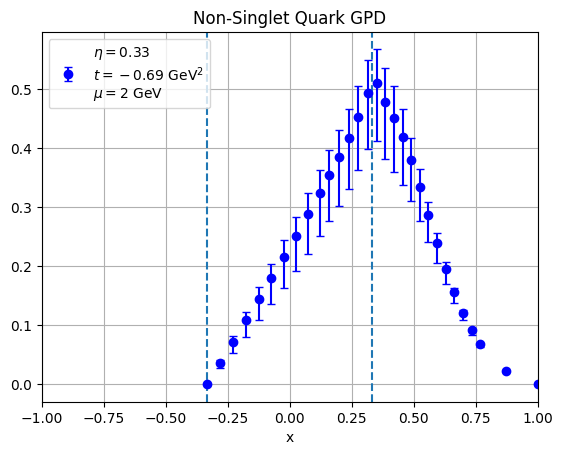

In [104]:
plot_mellin_barnes_non_singlet_q(1/3,-0.69,2)

Time for initial sampling: 0.702421 seconds
Time for plot computation: 9.210859 seconds


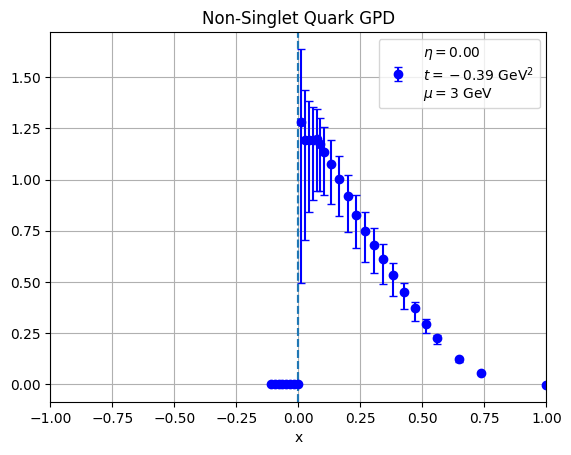

In [105]:
plot_mellin_barnes_non_singlet_q(0,-0.39,3)

Time for initial sampling: 1.023602 seconds
Time for plot computation: 14.113842 seconds


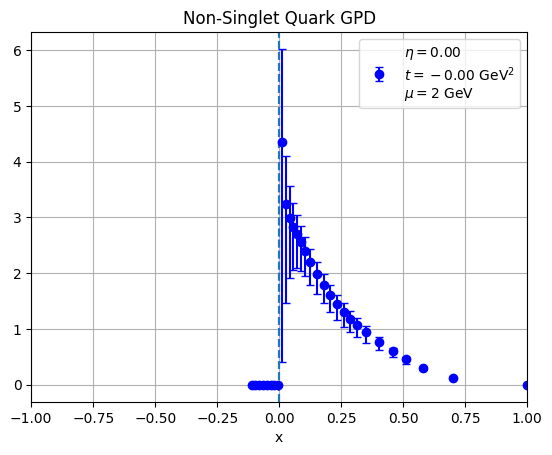

In [106]:
plot_mellin_barnes_non_singlet_q(0,-1e-6,2)

Time for initial sampling: 60.161631 seconds
Time for plot computation: 280.542264 seconds


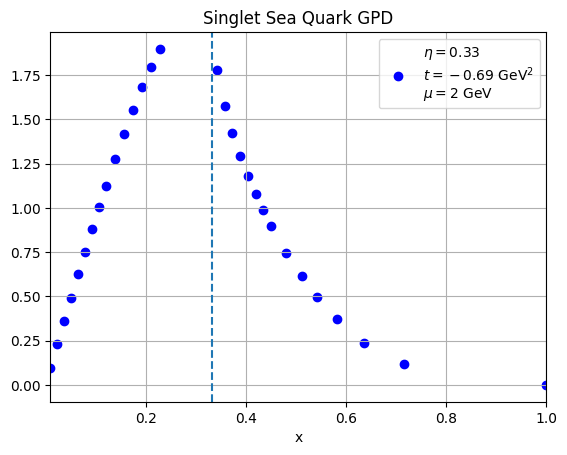

In [107]:
plot_mellin_barnes_singlet_q(1/3,-0.69,2,sampling=True,error_bars=False,n_points=30)

Time for initial sampling: 30.401860 seconds
Time for plot computation: 138.806843 seconds


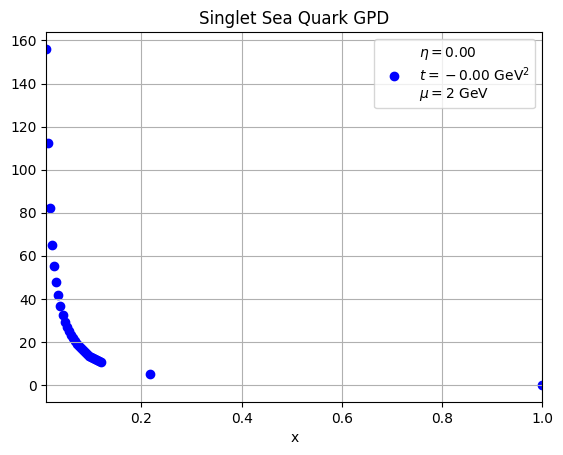

In [108]:
plot_mellin_barnes_singlet_q(0,-1e-3,2,sampling=True,error_bars=False,n_points=30)

Time for initial sampling: 72.684608 seconds
Time for plot computation: 403.229413 seconds


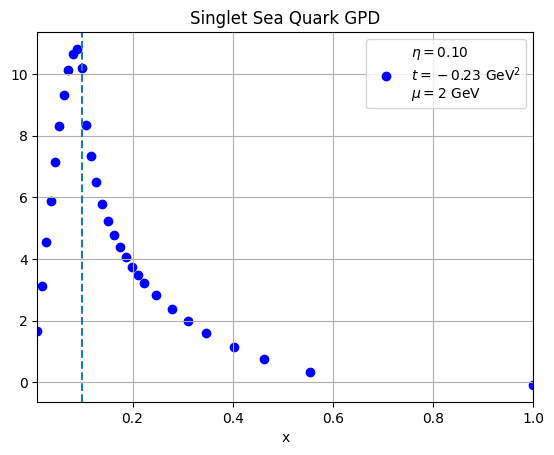

In [112]:
plot_mellin_barnes_singlet_q(0.1,-0.23,2,sampling=True,error_bars=False,n_points=30)

Time for initial sampling: 209.173250 seconds
Time for plot computation: 637.061636 seconds


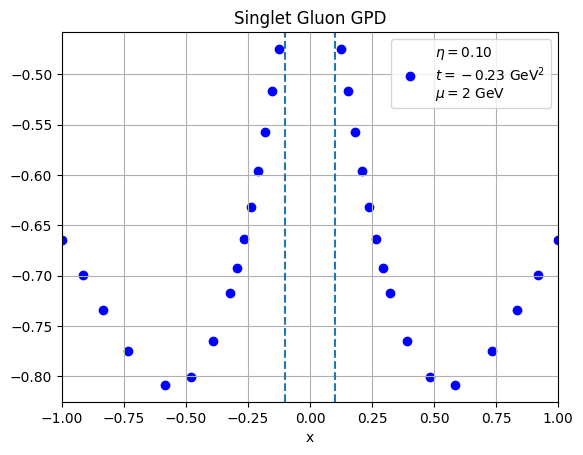

In [94]:
plot_mellin_barnes_gluon(0.1,-0.23,2,sampling=True,error_bars=False,n_points=30)